# Início: Preparação dos dados

In [7]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install numpy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from scipy import stats

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 2.7 MB/s eta 0:00:002.8 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 5.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 KB 7.0 MB/s eta 0:00:008.1 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable


In [8]:
%matplotlib inline

# @grellert: removendo warnings chatos
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [9]:
df = pd.read_csv(os.path.join('..','dados', 'brutos', 'heart_disease_dataset.csv'))

In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,52,0,1,169,479,0,0,124,0,3.7,2,3,3,0,0,27.8,0
3065,75,0,4,90,372,0,2,141,0,2.1,2,2,3,0,1,37.0,1
3066,68,1,4,166,564,0,1,76,0,4.5,3,1,3,0,0,16.1,1
3067,66,0,3,143,113,1,1,207,0,3.6,1,0,6,0,0,27.7,0


In [11]:
df = df.dropna()
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      67    1   2       111   536    0        2       88      0      1.3   
1      57    1   3       109   107    0        2      119      0      5.4   
2      43    1   4       171   508    0        1      113      0      3.7   
3      71    0   4        90   523    0        2      152      0      4.7   
4      36    1   2       119   131    0        2      128      0      5.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
3064   52    0   1       169   479    0        0      124      0      3.7   
3065   75    0   4        90   372    0        2      141      0      2.1   
3066   68    1   4       166   564    0        1       76      0      4.5   
3067   66    0   3       143   113    1        1      207      0      3.6   
3068   38    1   4       100   507    0        1      187      0      0.9   

      slope  ca  thal  smoking  diabetes   bmi  heart_disease  
0         3

In [20]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
count,3069.00000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000
mean,52.50114,0.555556,2.489736,145.306289,347.219941,0.145650,1.004236,135.157380,0.176279,3.189052,2.023786,0.626588,4.544477,0.348974,0.193874,27.496839,0.388074
std,13.70752,0.496985,1.110417,31.602321,146.853319,0.352813,0.812016,43.353197,0.381119,1.802815,0.817679,0.891447,1.751064,0.476723,0.395396,7.281731,0.487391
min,29.00000,0.000000,1.000000,90.000000,100.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,15.000000,0.000000
25%,41.00000,0.000000,2.000000,118.000000,215.000000,0.000000,0.000000,98.000000,0.000000,1.600000,1.000000,0.000000,3.000000,0.000000,0.000000,21.300000,0.000000
50%,53.00000,1.000000,2.000000,146.000000,350.000000,0.000000,1.000000,135.000000,0.000000,3.200000,2.000000,0.000000,3.000000,0.000000,0.000000,27.400000,0.000000
75%,64.00000,1.000000,3.000000,172.000000,475.000000,0.000000,2.000000,172.000000,0.000000,4.700000,3.000000,1.000000,6.000000,1.000000,0.000000,33.900000,1.000000
max,76.00000,1.000000,4.000000,200.000000,600.000000,1.000000,2.000000,210.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000,40.000000,1.000000


In [12]:
TH_CATEGORICO = 5
categoricos = [] 
string = []
quantitativos = []
nao_numericos = []

for col in df:
    print(col, df[col].unique())
    unicos = df[col].unique()
    ## dividindo colunas entre valores categoricos e quantitativos:
    if unicos.shape[0] < TH_CATEGORICO:
        categoricos.append(col)
    else: 
        quantitativos.append(col)
print(f'colunas categoricas: {len(categoricos)}, quantitativas: {len(quantitativos)}')

age [67 57 43 71 36 49 47 51 39 52 64 68 31 50 30 72 58 66 61 40 53 55 70 56
 44 75 65 35 37 46 32 42 54 48 63 45 34 62 38 59 76 73 69 29 33 41 60 74]
sex [1 0]
cp [2 3 4 1]
trestbps [111 109 171  90 119 186 113 103 125 158 164 149 184 144 166 169 143 115
 155 127 199 154 140 124 132 118 126 170 147 128 131 117  92  99 148 195
 165 136 183 121 145  91 192 160 141 180  98 123 138 162 173 142 172 189
 129 134 157 194 107  95 137 200  96 105 153 179 175 151 161 150 122 196
 163  93 178 177 174 104 188 146 130 176 112 197 114 152 159 120 187 182
 168  97 193 191 190 110  94 198 106 102 100 185 139 133 135 108 167 101
 156 181 116]
chol [536 107 508 523 131 571 127 305 592 486 327 227 354 574 311 338 306 417
 382 344 144 204 447 380 333 288 143 593 324 529 241 235 275 548 179 181
 234 443 276 482 342 154 240 556 539 155 114 284 413 518 187 196 243 576
 314 272 322 139 596 281 369 286 577 408 330 254 274 435 214 489 410 580
 399 117 371 111 503 400 291 331 542 192 317 377 452 600 586 402 128

# Fase I - Estatística

## Gerador de Dados Faltantes - MAR, MNAR e MCAR

In [51]:
def _sigmoid(z):
    return 1 / (1 + np.exp(-z))

def _std(s):
    # padroniza série numérica; lida com std=0
    v = (s - s.mean()) / (s.std() if s.std() > 0 else 1.0)
    return v.fillna(0.0)

def pick_missing_indices(strategy, X, y, col, k_pct, seed=None):
    """
    Retorna os índices (subset de X.index) que serão tornados NaN em X[col],
    seguindo o mecanismo: MCAR, MAR ou MNAR.
    k_pct é o alvo (ex.: 10,20,...,50).
    """
    rng = np.random.default_rng(seed)
    idx = X.index
    n = len(idx)
    k = int(n * k_pct / 100)

    # candidatos com valor válido
    mask_valid = X[col].notna()
    idx_valid = idx[mask_valid]
    n_valid = mask_valid.sum()
    k = min(k, n_valid)

    if k == 0:
        return np.array([], dtype=int)

    if strategy == "MCAR":
        # tudo equiprovável
        return rng.choice(idx_valid, size=k, replace=False)

    elif strategy == "MAR":
        # exemplo MAR: prob perde dado em 'col' aumenta com outras colunas e/ou com y
        # ajuste os termos conforme seu caso
        # Sugestões (com suas colunas):
        # - chol faltante ↑ quando bmi alto e y=1
        # - trestbps faltante ↑ quando oldpeak alto
        # - thalach faltante ↑ quando y=1 e bmi alto
        # default genérico: usa algumas colunas diferentes de 'col' se existirem
        predictors = [c for c in ["bmi", "oldpeak", "thalach", "trestbps", "chol"] if c in X.columns and c != col]
        z = np.zeros(n)
        if predictors:
            for p in predictors[:2]:  # pega as 1-2 mais simples
                z += _std(X[p]).to_numpy()
        if y is not None:
            z += 0.8 * _std(y.astype(float)).to_numpy()
        p = _sigmoid(z)  # 0..1

    elif strategy == "MNAR":
        # MNAR: depende do próprio valor da coluna (que teremos aqui porque é dado "verdade")
        s = _std(X[col].astype(float))
        # Ex.: quanto maior o valor (p.ex., chol alto), maior chance de faltar
        z = 1.2 * s.to_numpy()          # direcionalidade
        p = _sigmoid(z)

    else:
        raise ValueError("strategy deve ser 'MCAR', 'MAR' ou 'MNAR'.")

    # restringe a candidatos válidos
    p_all = np.zeros(n)
    p_all[mask_valid.to_numpy()] = p[mask_valid.to_numpy()]

    # normaliza para amostrar aproximadamente k itens:
    # método: amostragem sem reposição ponderada por p (convertida para pesos)
    w = p_all + 1e-9  # evita zeros
    w = w / w.sum()
    chosen = rng.choice(idx, size=k, replace=False, p=w)
    # garante que são válidos (pode acontecer ruído numérico)
    chosen = np.array([i for i in chosen if i in idx_valid])[:k]
    # fallback se por algum motivo sobrar menos que k
    if len(chosen) < k:
        fill = rng.choice(idx_valid.difference(chosen), size=(k - len(chosen)), replace=False)
        chosen = np.concatenate([chosen, fill])
    return chosen


In [62]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer


# k: % de linhas a mascarar; X: só quantitativas; y: série binária (0/1); col: coluna alvo; method: 'mean'|'median'|'knn_5'|'mice'|'missforest'|'empty'
def imputation_test(k, X, y, col, method, missing_mech='MAR', seed=None):
    rng = np.random.default_rng(seed)   # controla reprodutibilidade
    X_nan = X.copy(deep=True)

    to_nan = pick_missing_indices(missing_mech, X_nan, y, col, k, rng)
    if len(to_nan) > 0:
        X_nan.loc[to_nan, col] = np.nan

    # ===== Imputação =====
    if method == 'mean':
        Xi = X_nan.copy()
        Xi[col] = Xi[col].fillna(Xi[col].mean())

    elif method == 'median':
        Xi = X_nan.copy()
        Xi[col] = Xi[col].fillna(Xi[col].median())

    elif method.startswith("knn_"):
        n = int(method.split("_")[1])
        imputer = KNNImputer(n_neighbors=n)
        Xi = pd.DataFrame(imputer.fit_transform(X_nan), columns=X_nan.columns, index=X_nan.index)

    elif method in ('missforest', 'mice'):
        imp = IterativeImputer(random_state=0)
        Xi = pd.DataFrame(imp.fit_transform(X_nan), columns=X_nan.columns, index=X_nan.index)

    elif method == 'empty':
        Xi = X_nan.copy()

    else:
        print("method not available or invalid")
        return None

    return Xi, y


def compare(one_col_orig: pd.Series, one_col_imputed: pd.Series, y: pd.Series):
    # garantir alinhamento e tipo do desfecho
    one_col_imputed = one_col_imputed.astype(float)
    one_col_orig    = one_col_orig.loc[one_col_imputed.index].astype(float)
    y               = y.loc[one_col_imputed.index].astype(float)

    d_mean   = one_col_imputed.mean()   - one_col_orig.mean()
    d_std    = one_col_imputed.std()    - one_col_orig.std()
    d_median = one_col_imputed.median() - one_col_orig.median()
    d_min    = one_col_imputed.min()    - one_col_orig.min()
    d_max    = one_col_imputed.max()    - one_col_orig.max()
    corr     = one_col_imputed.corr(y)

    return [d_mean, d_std, d_median, d_min, d_max, corr]


def test_column(X, y, col, method, missing_mech='MAR'):
    rows = []
    ks   = (10, 20, 30, 40, 50)
    reps = 50
    seed_base = 2025  # fixa base para reprodutibilidade

    for k in ks:
        for r in range(reps):
            seed = seed_base + 1000*k + r
            out = imputation_test(k, X, y, col, method, missing_mech=missing_mech, seed=seed)
            if out is None:
                continue
            Xi, yi = out
            deltas = compare(X[col], Xi[col], yi)
            rows.append([method, k, col, missing_mech] + deltas)

    return pd.DataFrame(
        rows,
        columns=['imputation method', 'pct imputed', 'attribute', 'missing_mech',
                 'Δmean', 'Δstd', 'Δmedian', 'Δmin', 'Δmax', 'correl']
    )


def generate_results(X, y, method, missing_mech='MAR'):
    # X: apenas quantitativas; y: Série desfecho 0/1
    dfs = []
    for col in X.columns:
        print(f"Processing {col} with {method}")
        dfs.append(test_column(X, y, col, method, missing_mech=missing_mech))
    return pd.concat(dfs, ignore_index=True)

In [66]:
class_col = 'heart_disease'

## retirar de df[quantitativos] a coluna age
quantitativos = [col for col in quantitativos if col != 'age']

X = df[quantitativos].copy()
y = df[class_col].astype(int).copy()  # 0/1

# MAR

df_vis1 = generate_results(X, y, 'mean', missing_mech='MAR')
df_vis2 = generate_results(X, y, 'mice', missing_mech='MAR')
df_vis3 = generate_results(X, y, 'empty', missing_mech='MAR')

# MNAR
df_vis4 = generate_results(X, y, 'mean', missing_mech='MNAR')
df_vis5 = generate_results(X, y, 'mice', missing_mech='MNAR')
df_vis6 = generate_results(X, y, 'empty', missing_mech='MNAR')

Processing trestbps with mean
Processing chol with mean
Processing thalach with mean
Processing oldpeak with mean
Processing bmi with mean
Processing trestbps with mice
Processing chol with mice
Processing thalach with mice
Processing oldpeak with mice
Processing bmi with mice
Processing trestbps with empty
Processing chol with empty
Processing thalach with empty
Processing oldpeak with empty
Processing bmi with empty
Processing trestbps with mean
Processing chol with mean
Processing thalach with mean
Processing oldpeak with mean
Processing bmi with mean
Processing trestbps with mice
Processing chol with mice
Processing thalach with mice
Processing oldpeak with mice
Processing bmi with mice
Processing trestbps with empty
Processing chol with empty
Processing thalach with empty
Processing oldpeak with empty
Processing bmi with empty


In [67]:
df_vis = pd.concat([df_vis1, df_vis2, df_vis3, df_vis4, df_vis5, df_vis6])

In [68]:
def generate_vis(df_vis, coluna, value):
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,25))
    
    sns.boxplot(ax=axes[0], x = 'pct imputed', y = 'Δmean', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette="pastel"); 
    sns.boxplot(ax=axes[1], x = 'pct imputed', y = 'Δmedian', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette="pastel"); 
    sns.boxplot(ax=axes[2], x = 'pct imputed', y = 'Δstd', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette="pastel"); 
    sns.boxplot(ax=axes[3], x = 'pct imputed', y = 'correl', hue = 'imputation method', data = df_vis[df_vis['attribute'] == coluna], palette="pastel",showfliers = False); 

    axes[0].set_title(coluna)
    axes[1].set_title(coluna)
    axes[2].set_title(coluna)
    axes[3].set_title(coluna)
    
        
    axes[0].axhline(y=0, linestyle = '--')
    axes[1].axhline(y=0, linestyle = '--')
    axes[2].axhline(y=0, linestyle = '--')
    # axes[3].axhline(y=value, linestyle = '--')
    # axes[3].axhline(y=1, linestyle = '--')
    # axes[3].axhline(y=-1, linestyle = '--')

In [69]:
def generate_vis_imp(df_vis, col):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,25))
    
    sns.boxplot(ax=axes[0], x = 'pct imputed', y = 'Δmean', hue = 'imputation method', data = df_vis, palette="pastel", showfliers = False);  
    sns.boxplot(ax=axes[1], x = 'pct imputed', y = 'Δmedian', hue = 'imputation method', data = df_vis, palette="pastel", showfliers = False); 
    sns.boxplot(ax=axes[2], x = 'pct imputed', y = 'Δstd', hue = 'imputation method', data = df_vis, palette="pastel", showfliers = False); 

    axes[0].set_title(col)
    axes[0].axhline(y=0, linestyle = '--')
    axes[1].axhline(y=0, linestyle = '--')
    axes[2].axhline(y=0, linestyle = '--')


In [27]:
for col in df_quant:
    if col == max_col:
        value = max_value
    elif col == min_col:
        value = min_value
    elif col == az_col:
        value = almost_zero
    else:
        value = correlations[col]
    generate_vis(df_vis, col, value)

NameError: name 'max_col' is not defined

In [41]:
for i in df_quant.columns:
    print(i)

# for i in df_quant.columns:
#     if i == 'RESPIRATORY_RATE_MAX':
#         value = max_value
#     elif i == 'LACTATE_MEDIAN':
#         value = min_value
#     elif i == 'OXYGEN_SATURATION_MEDIAN':
#         value = almost_zero
#     generate_vis(df_vis, i, value)
    

Age
RestingBP
Cholesterol
MaxHR
Oldpeak


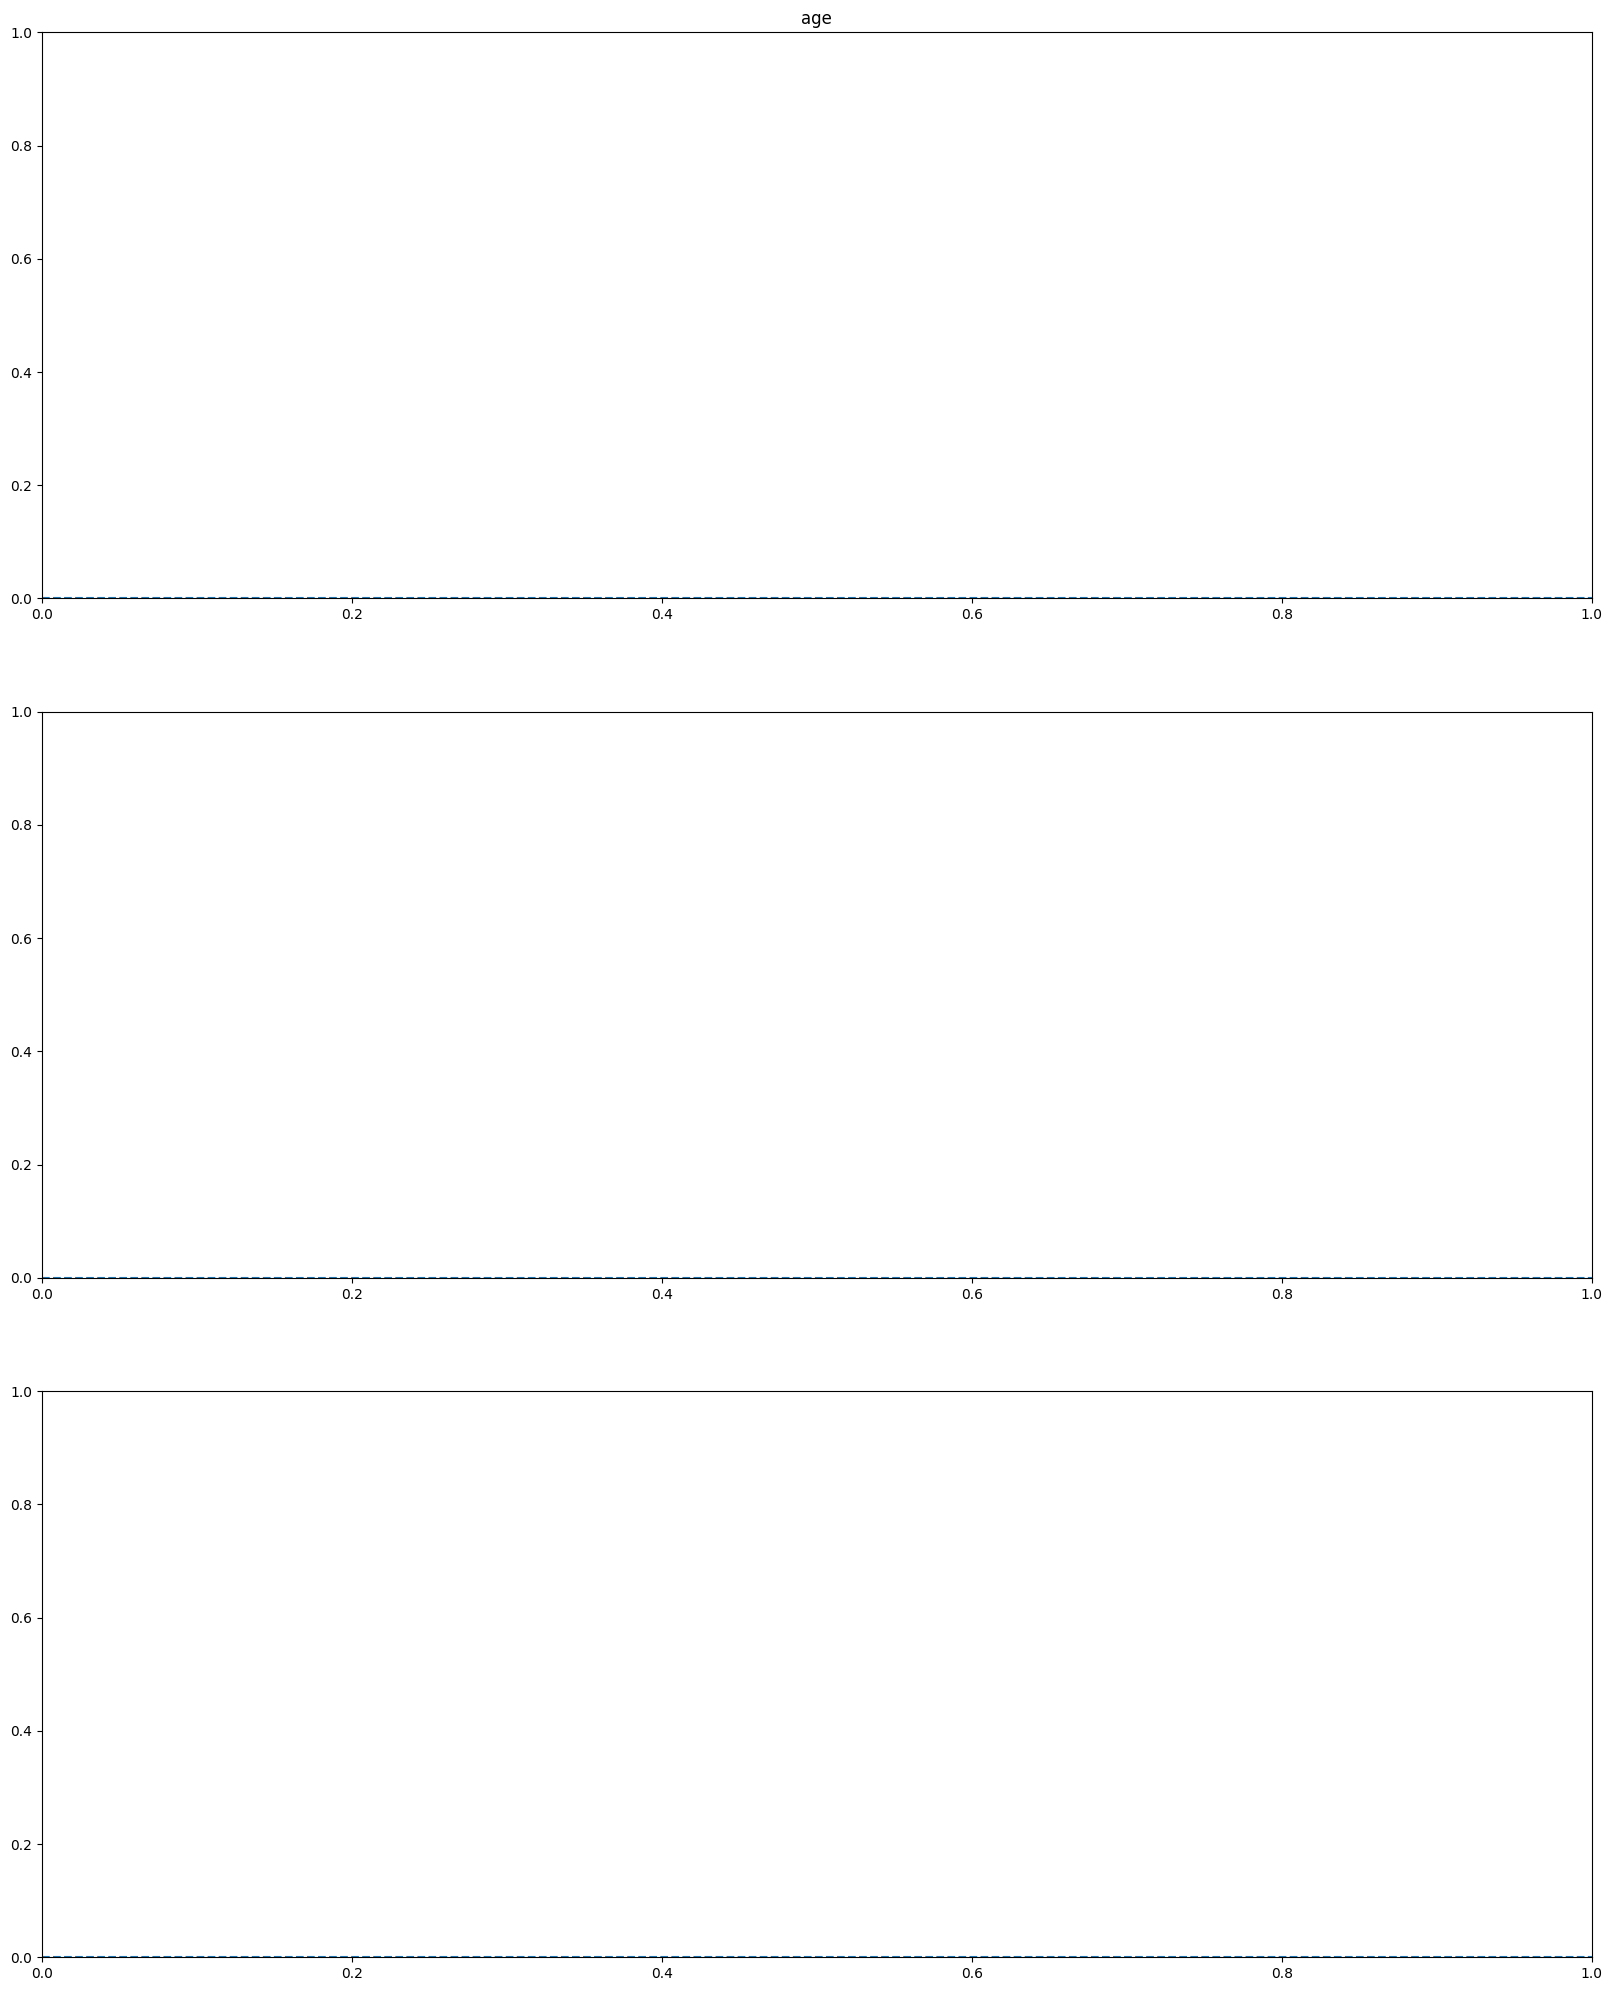

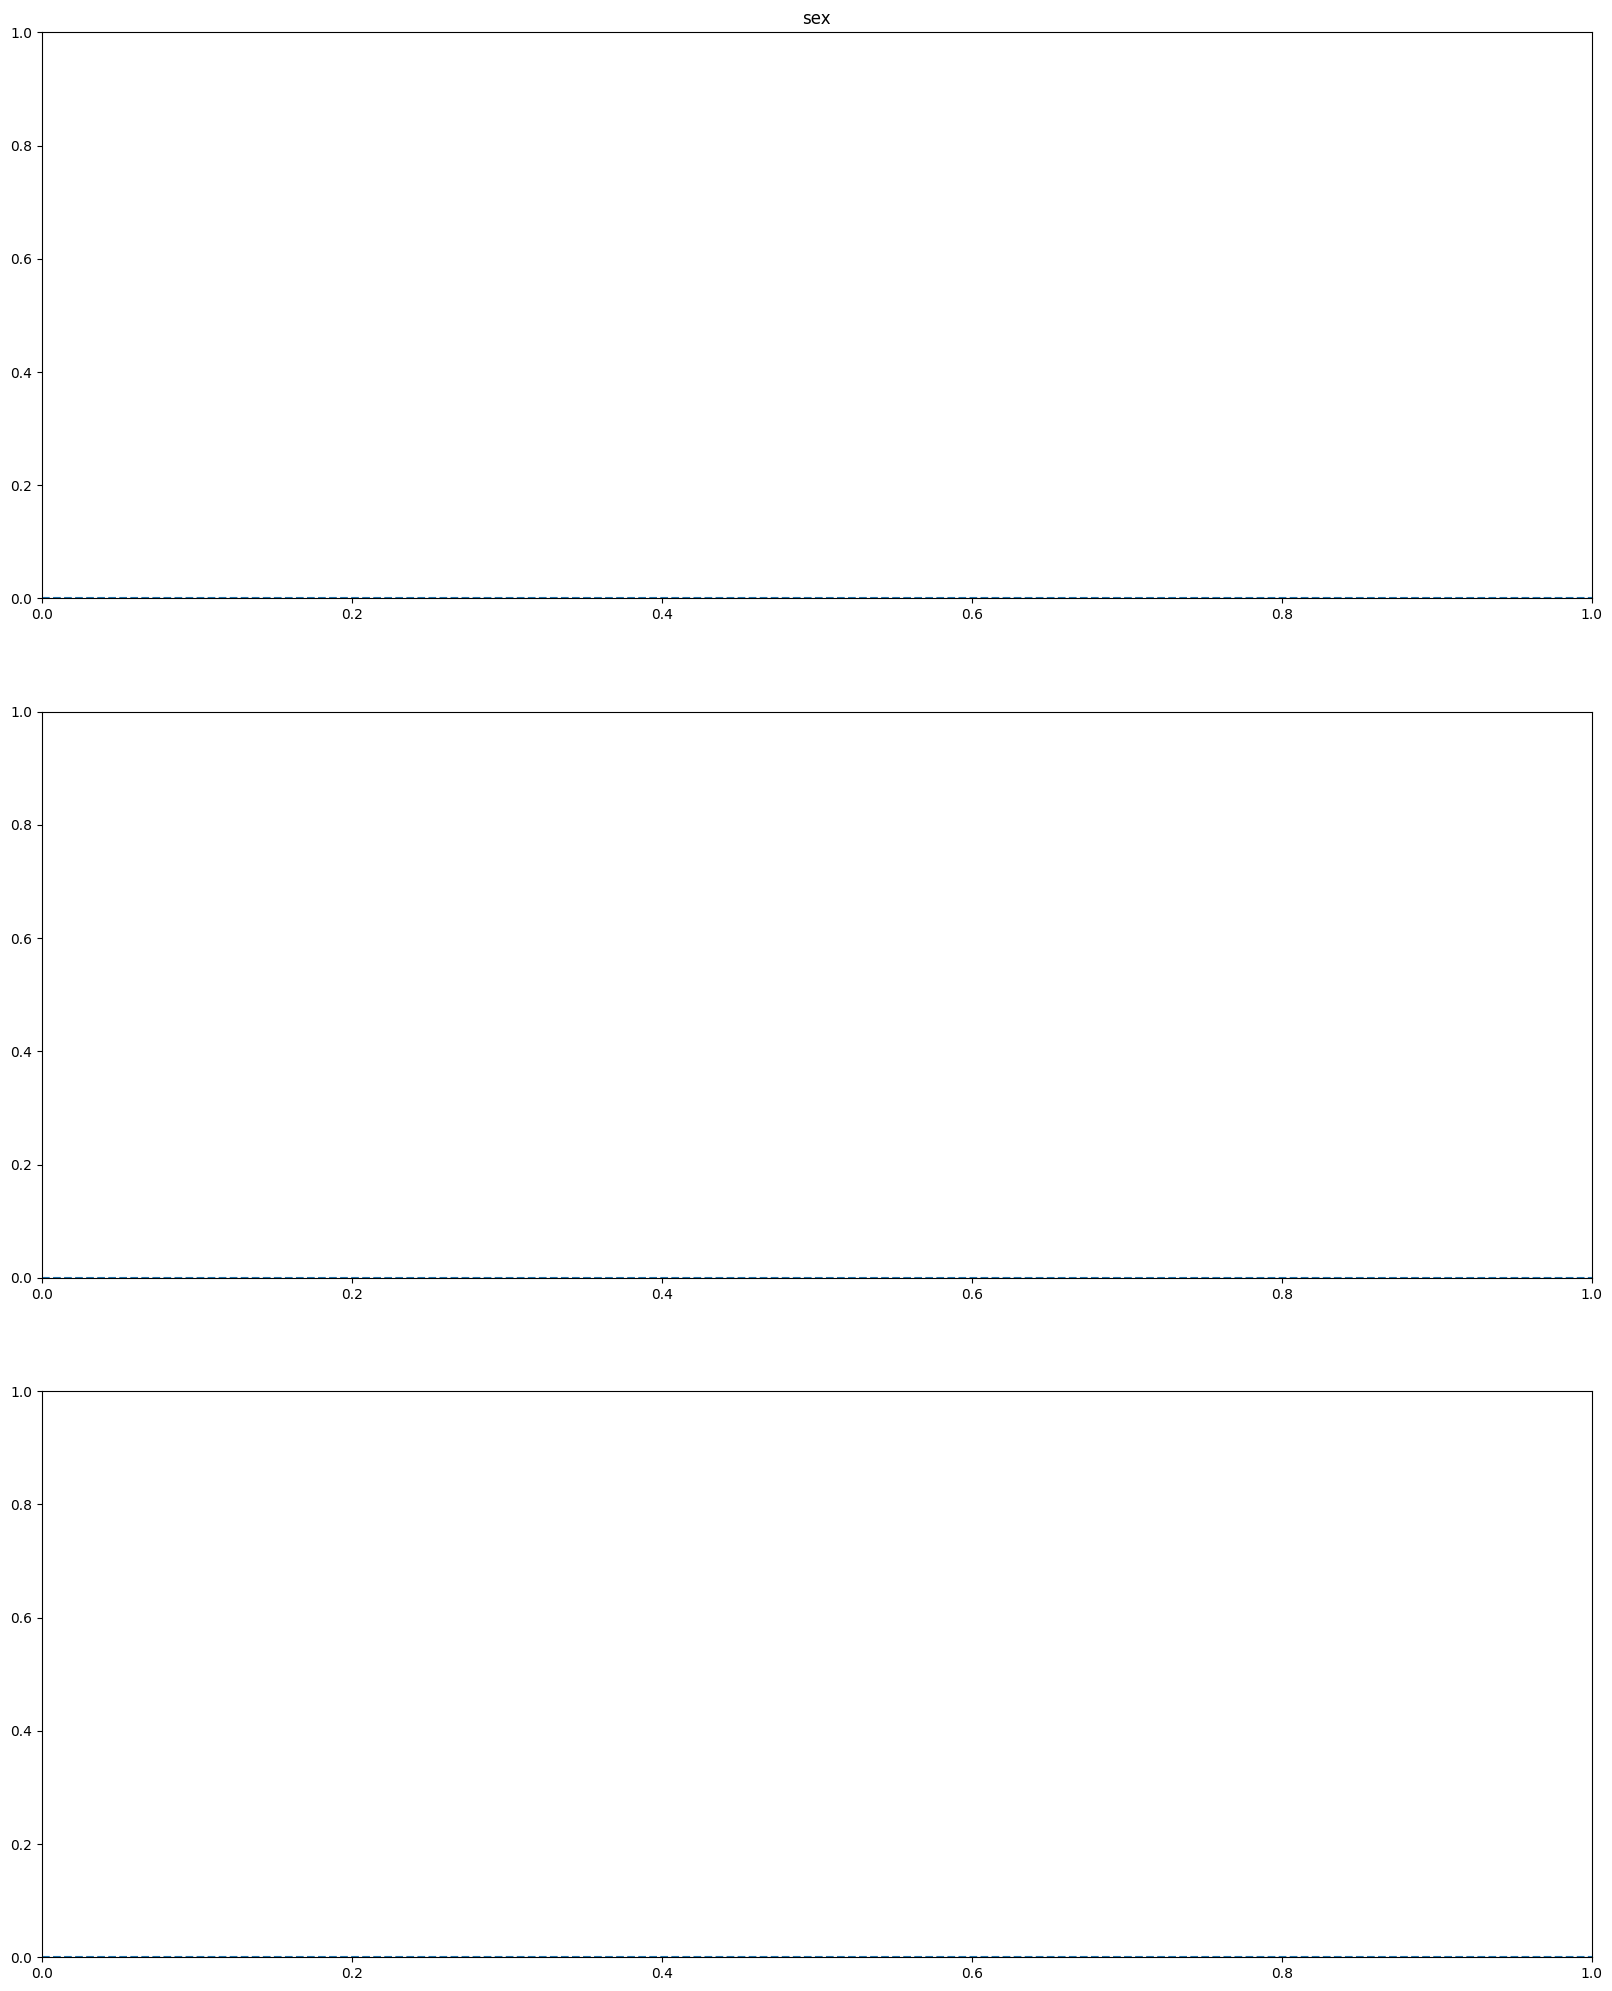

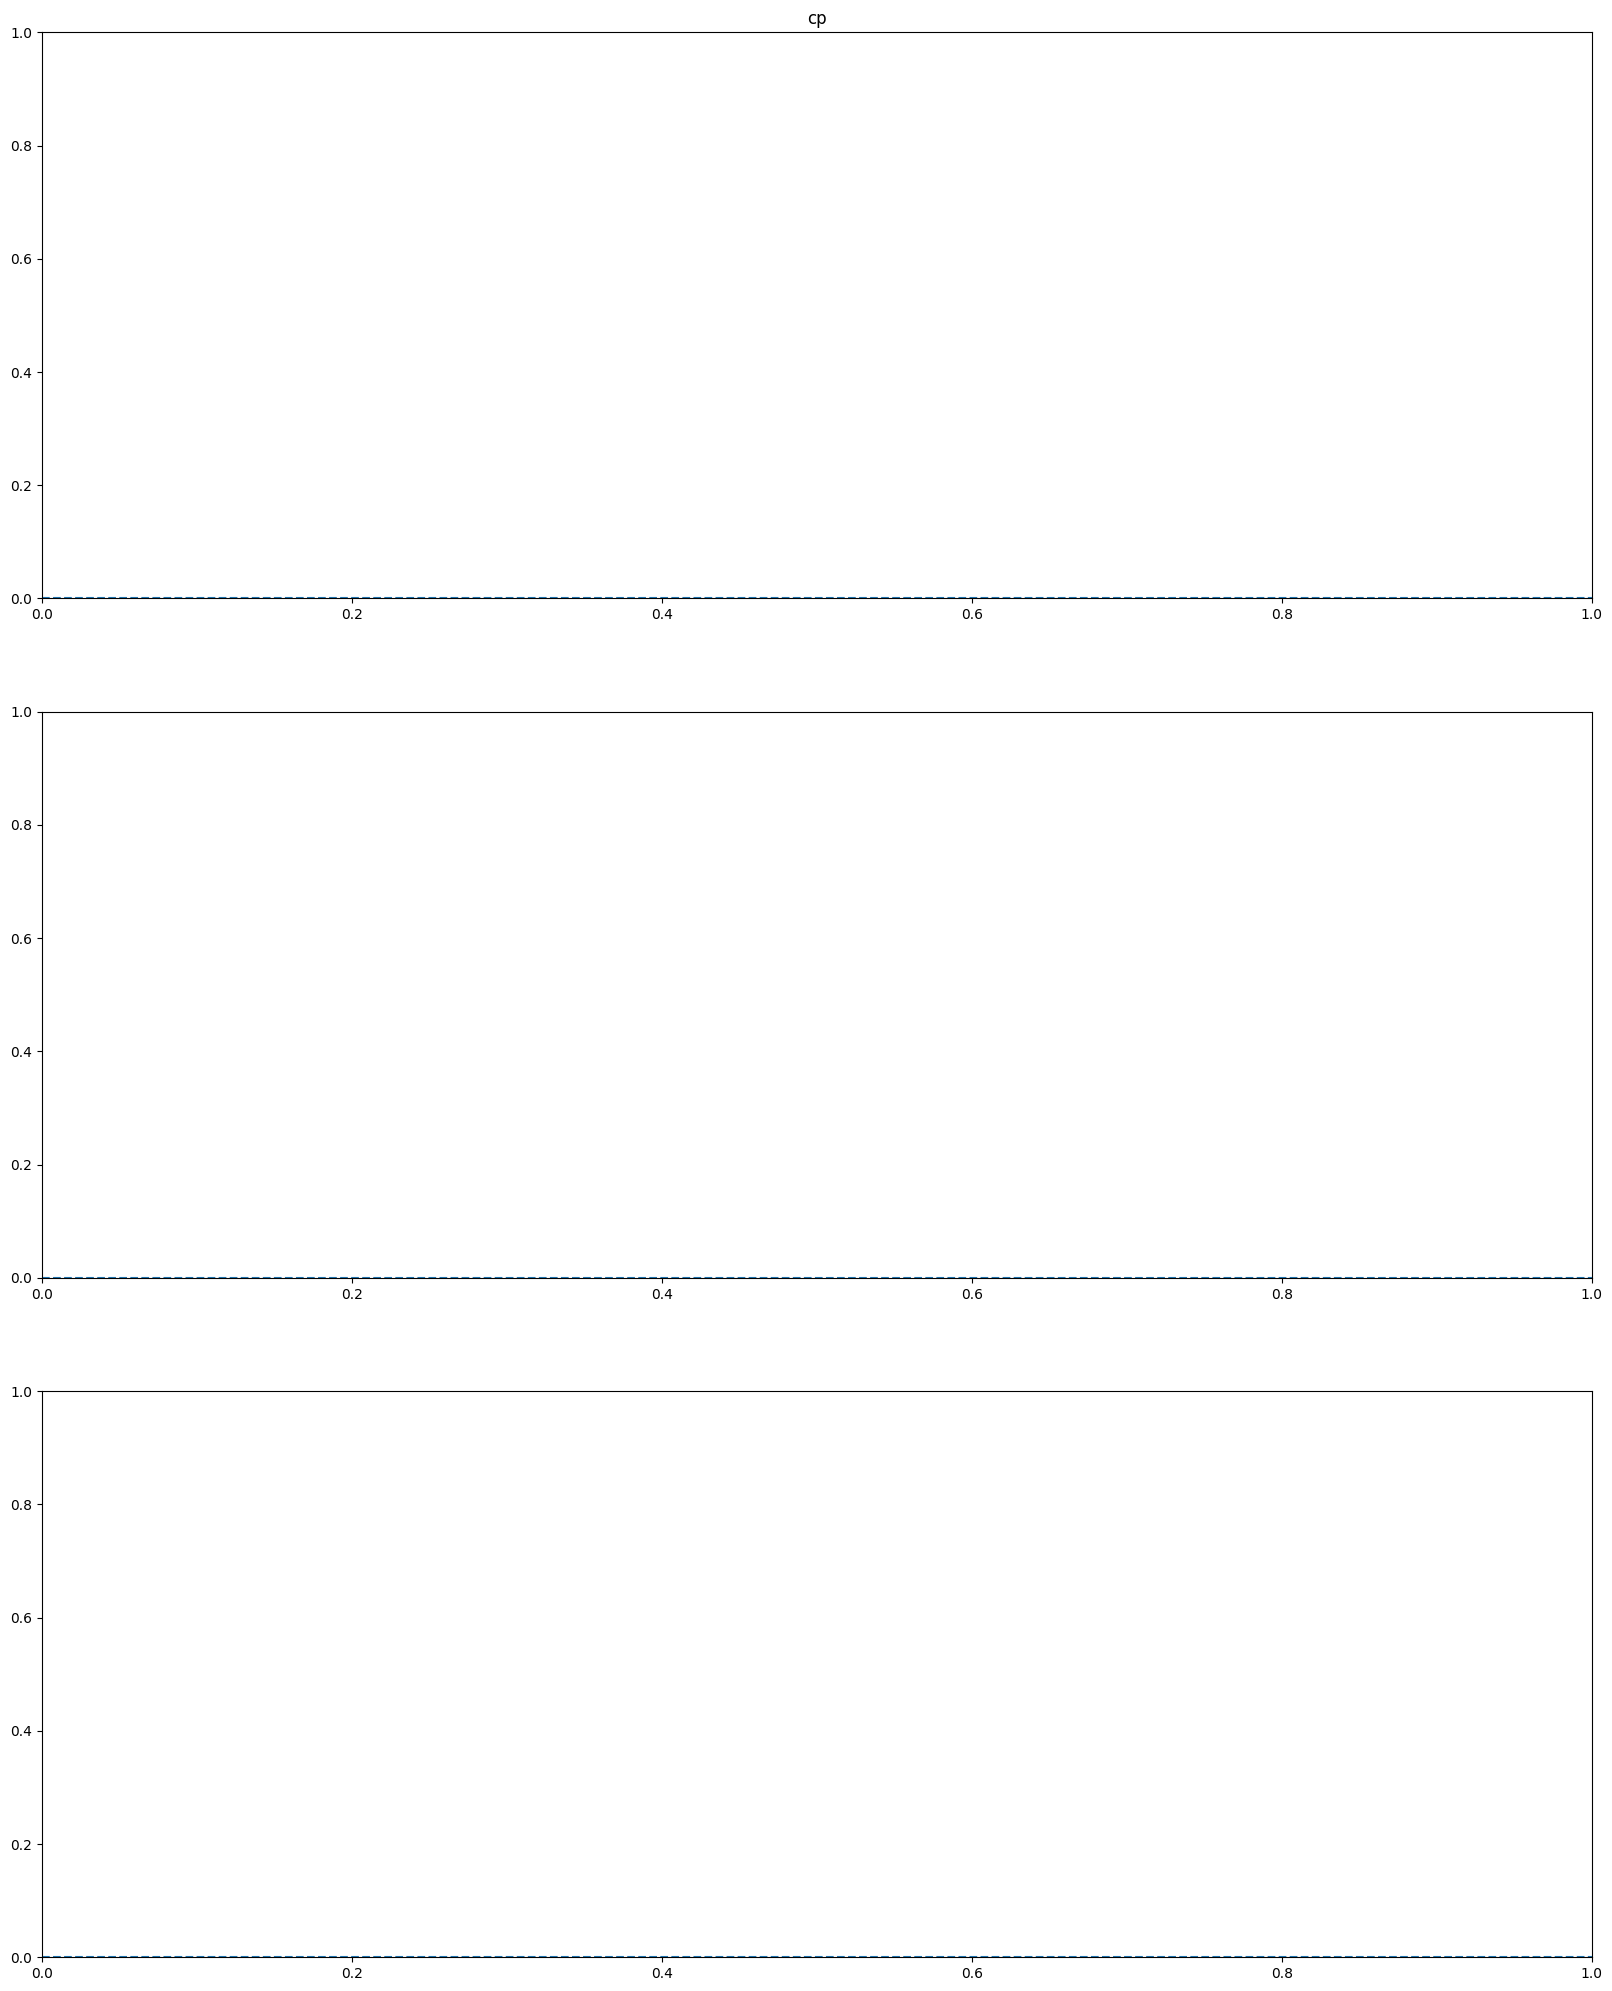

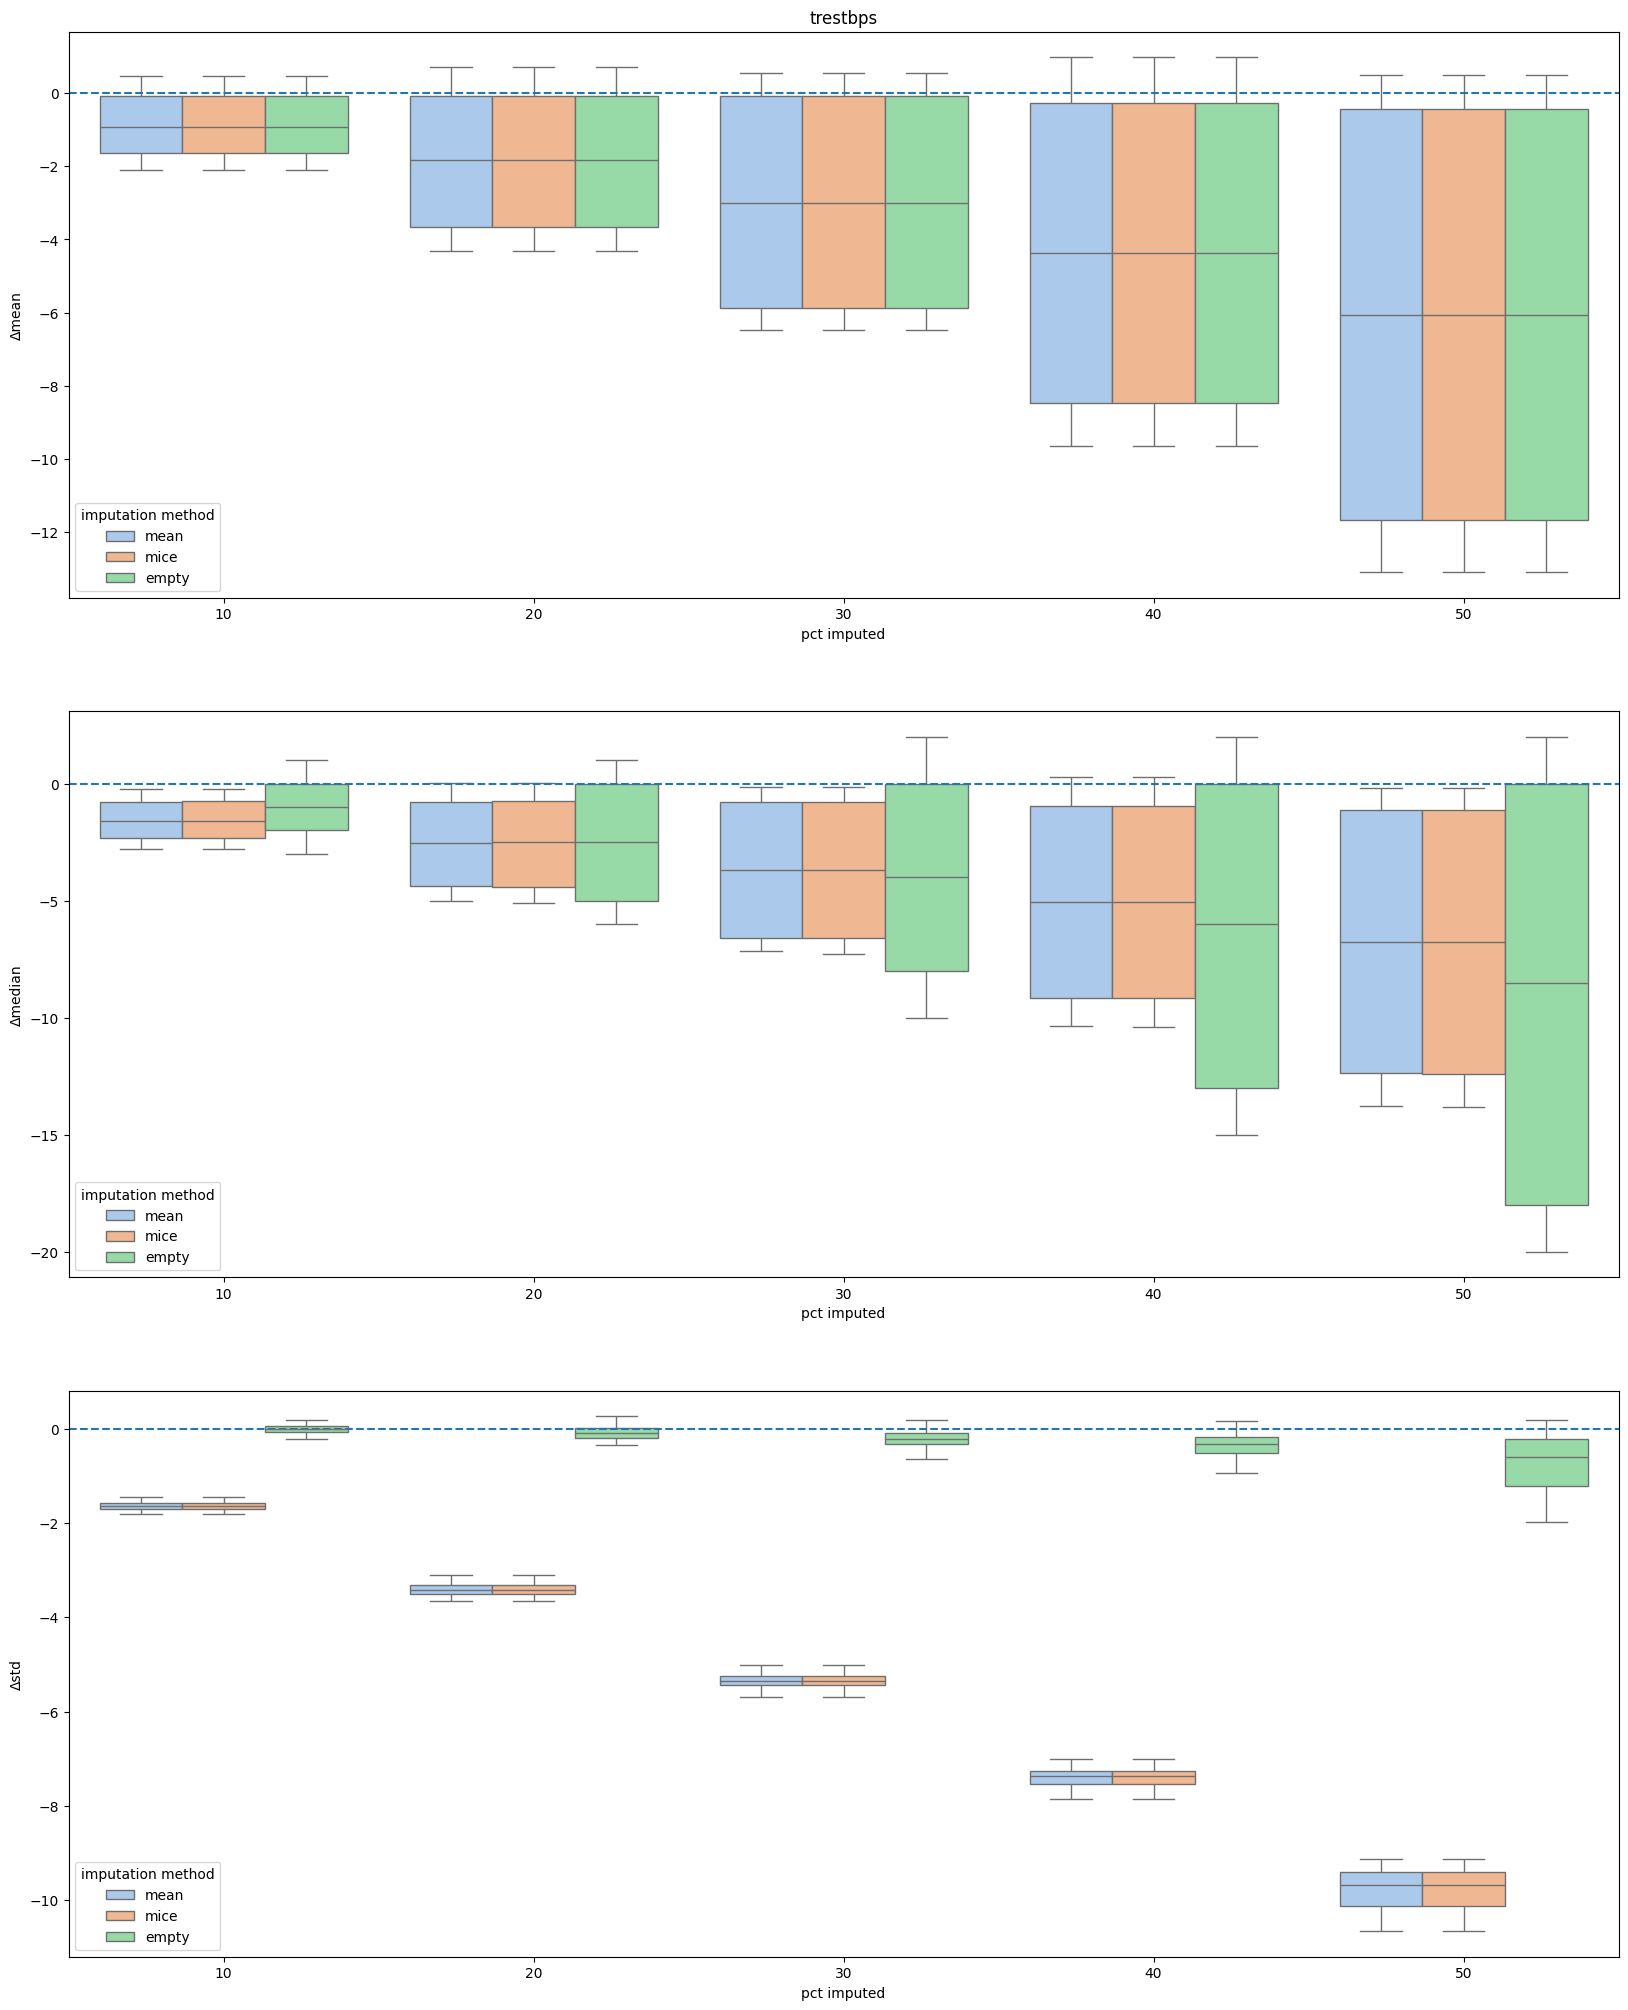

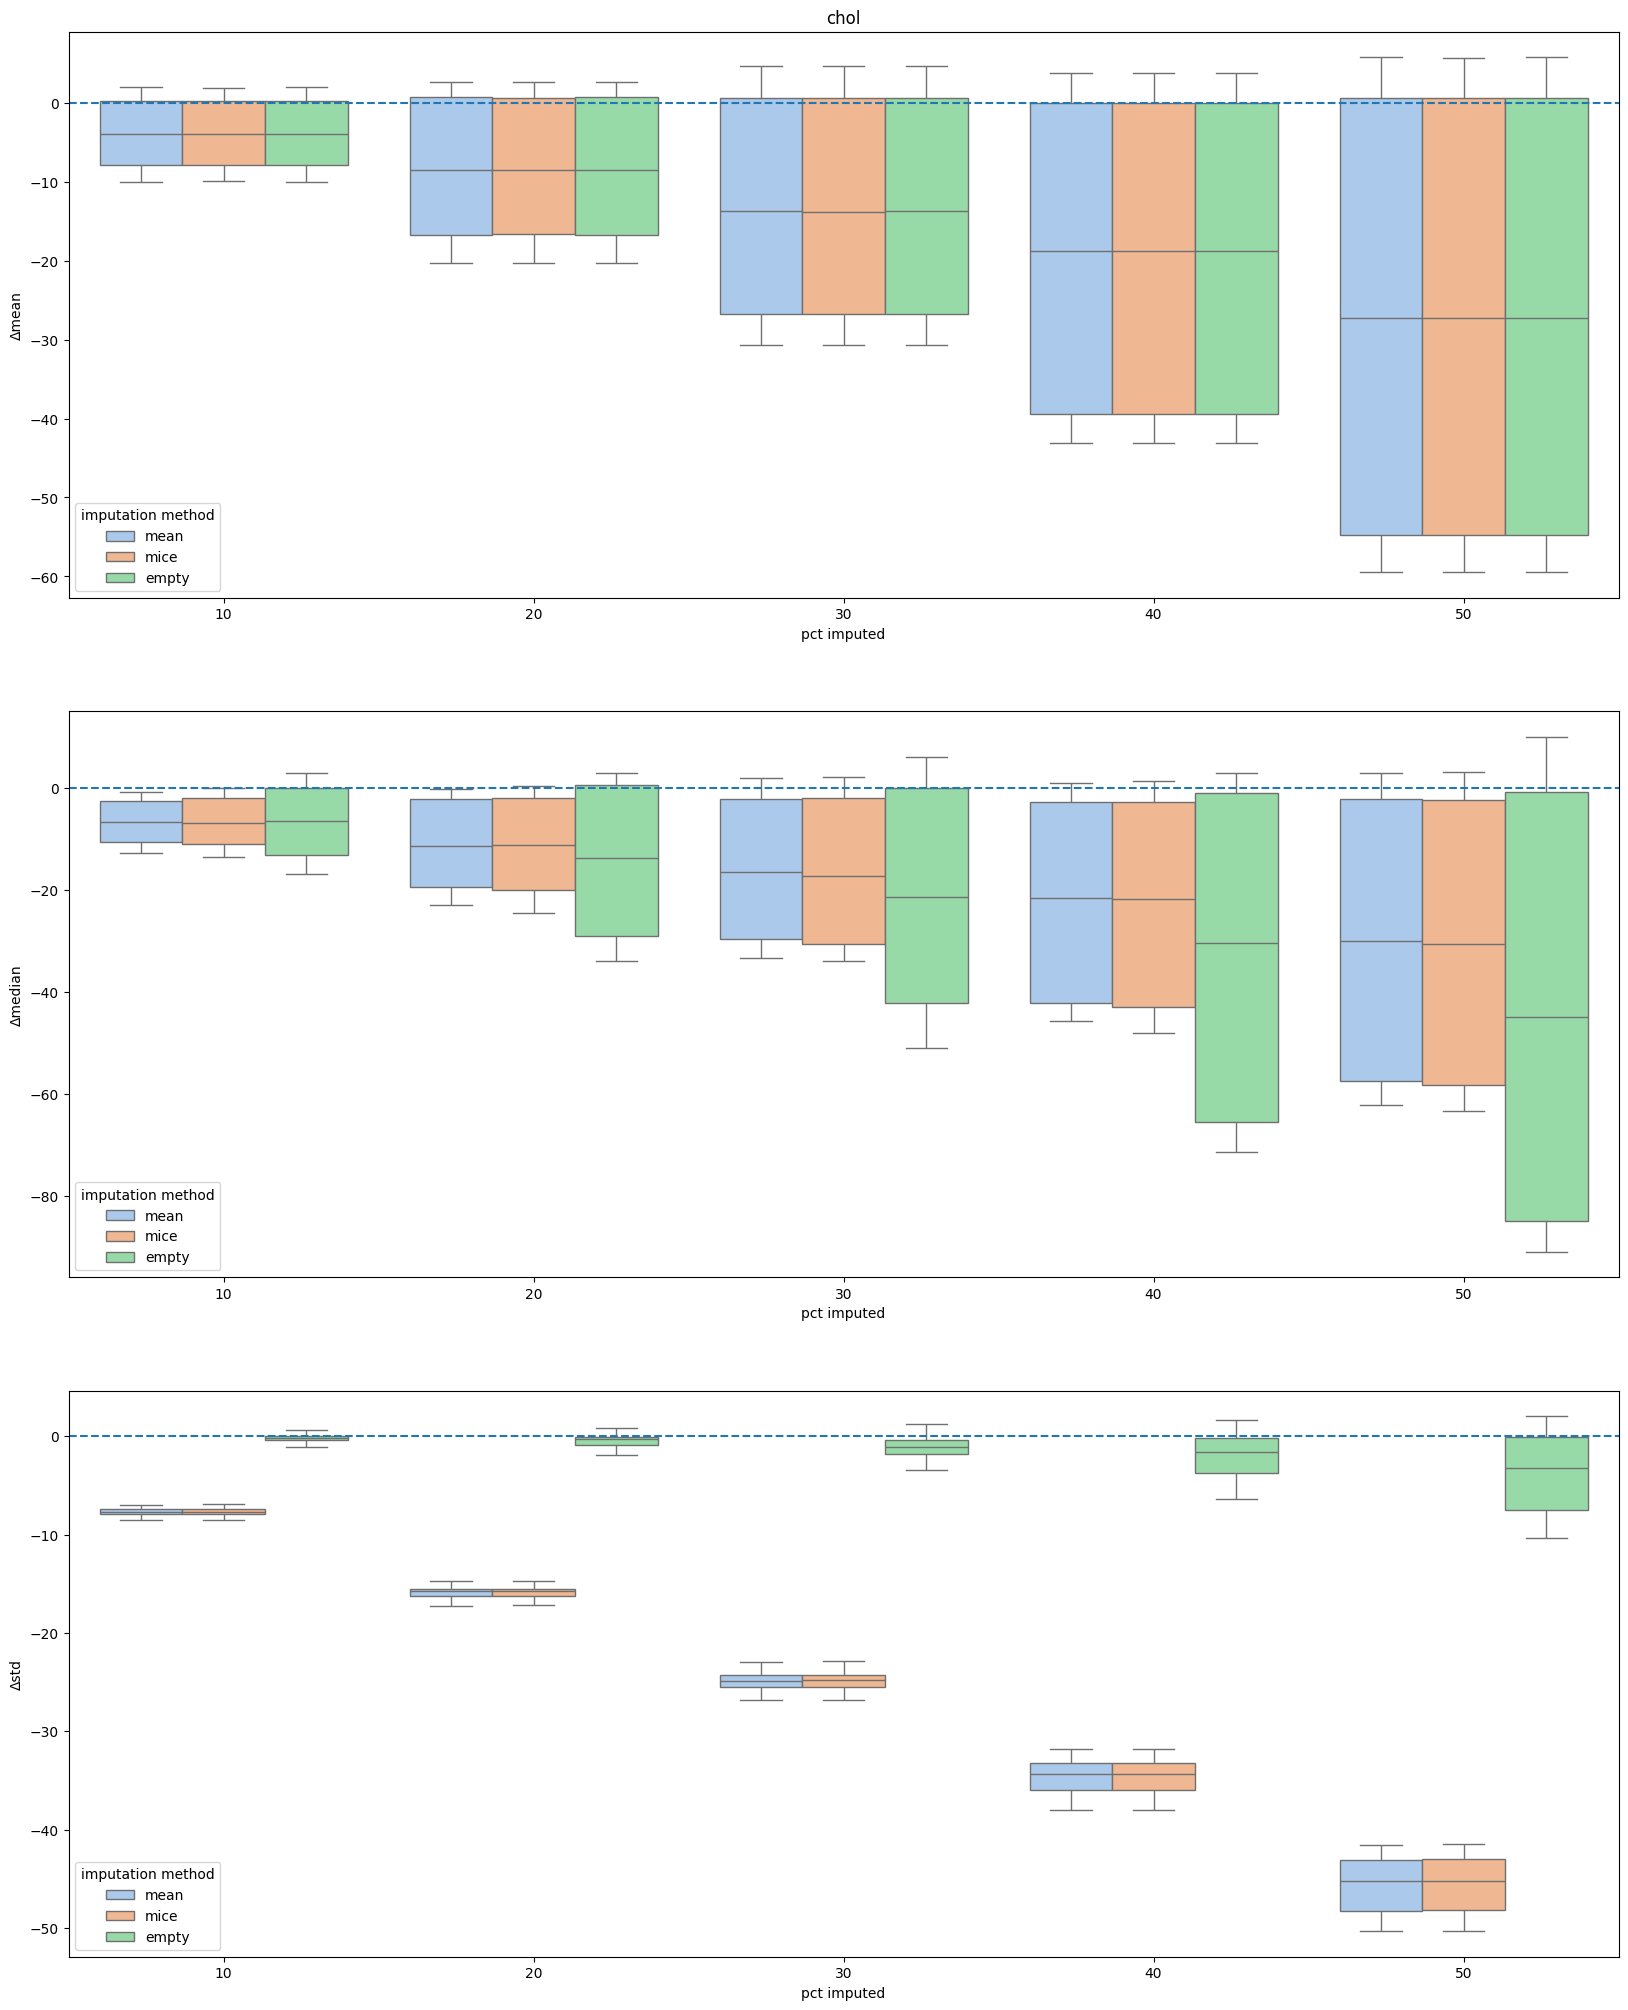

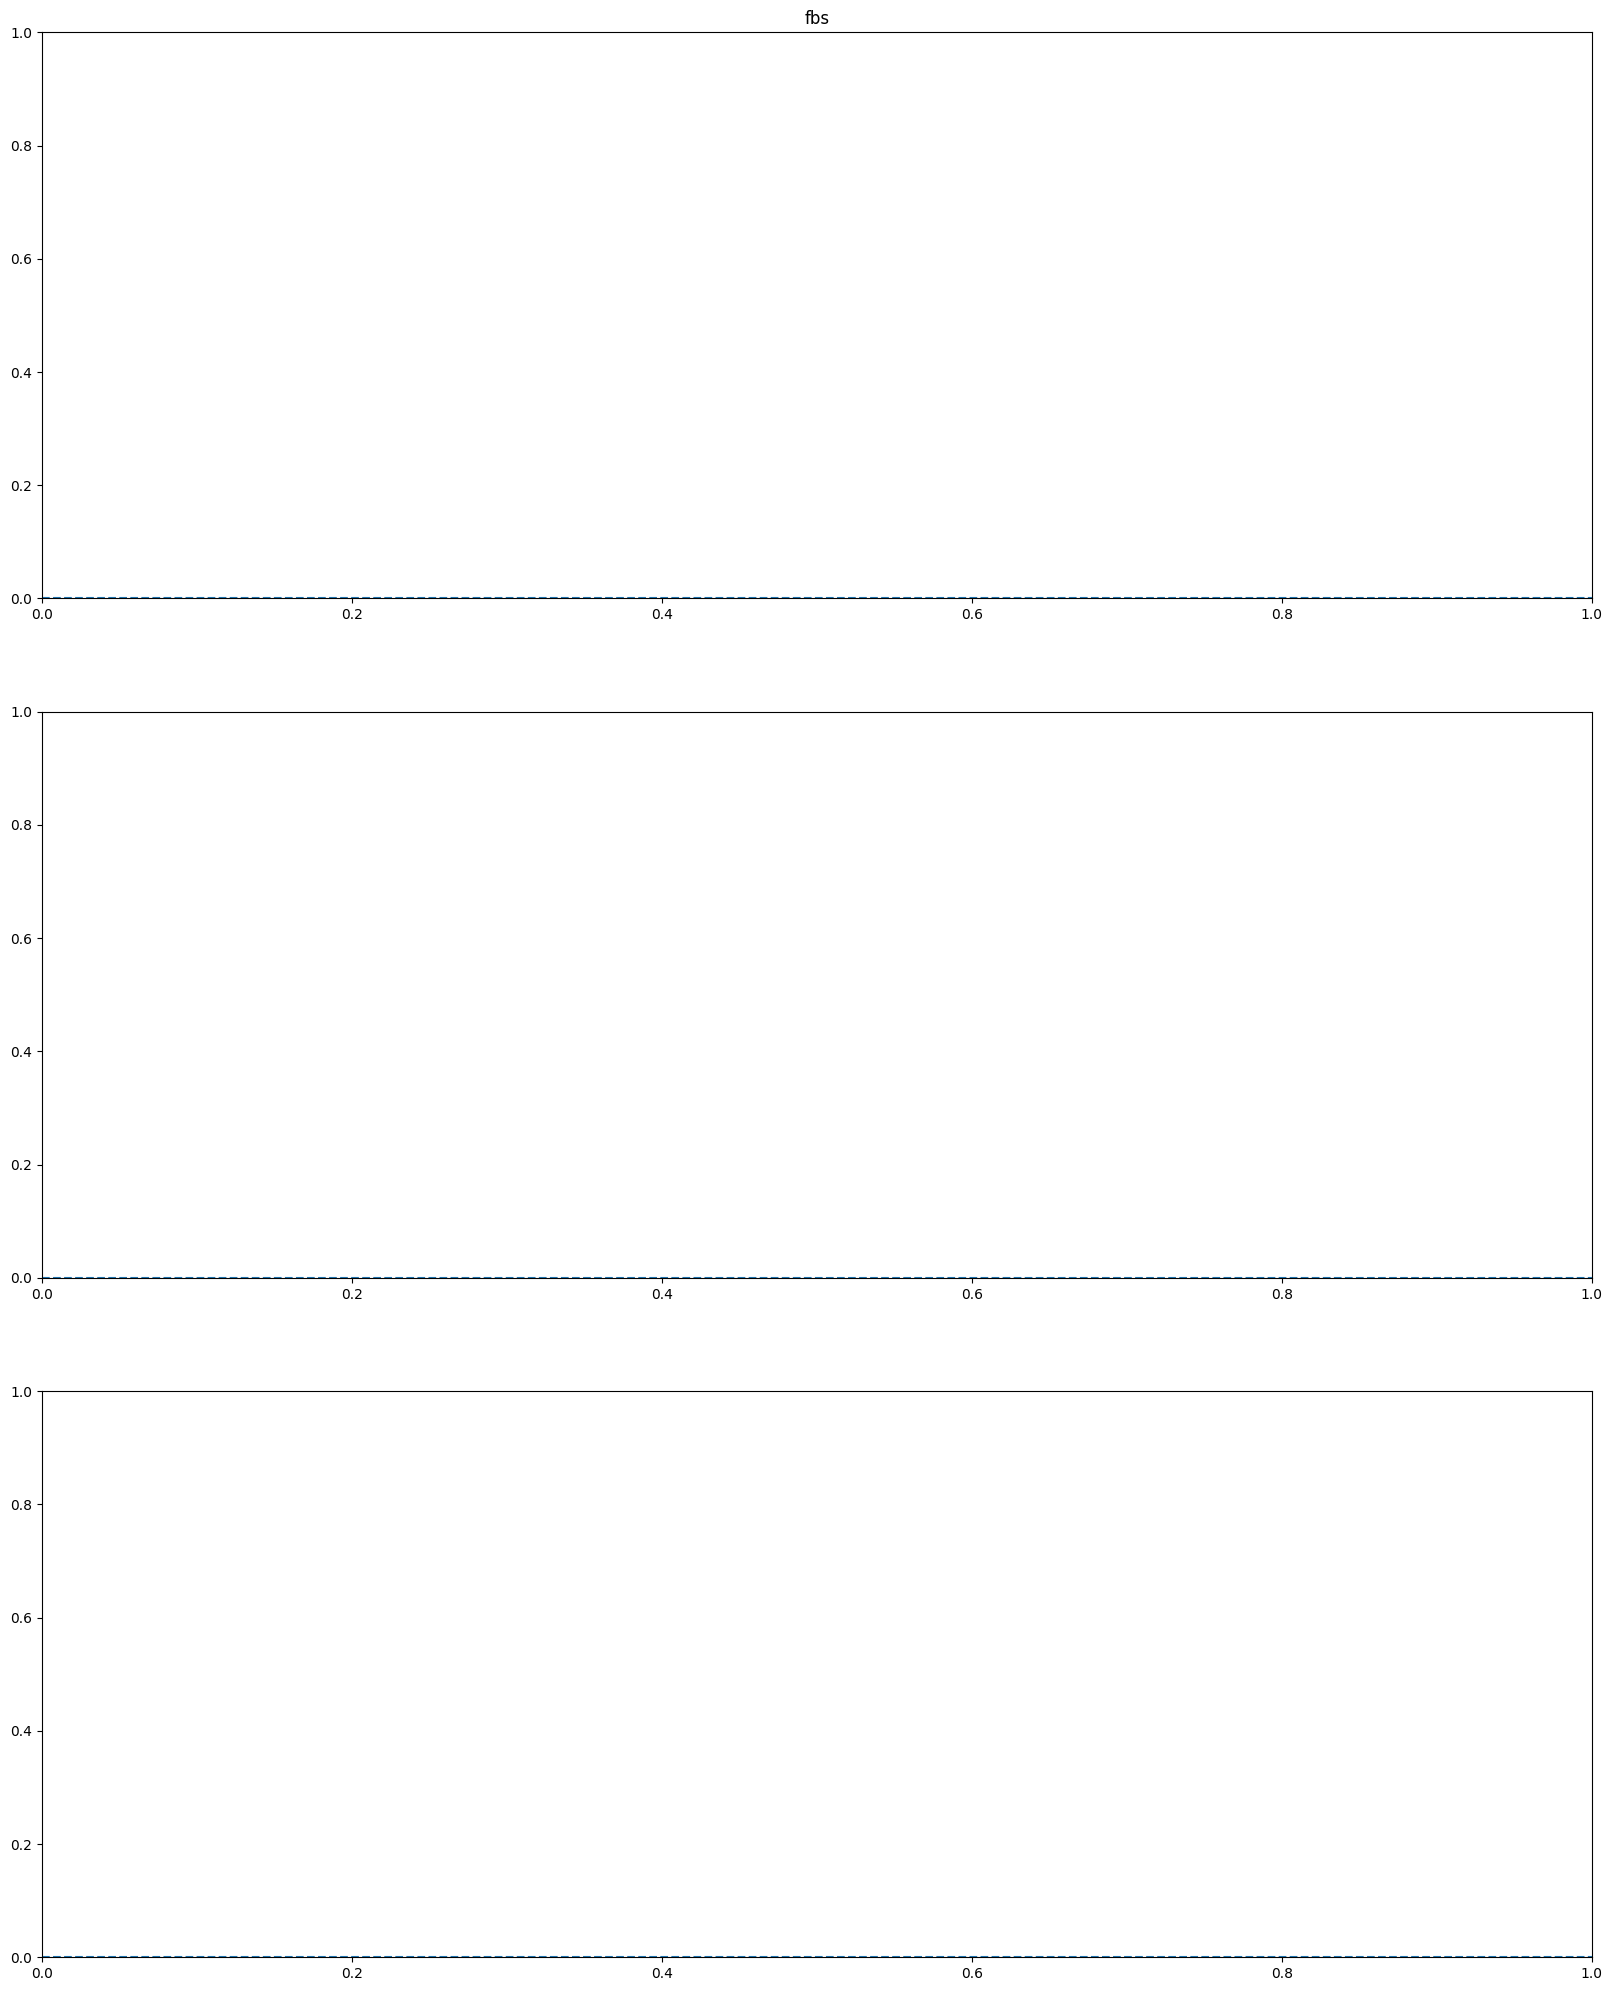

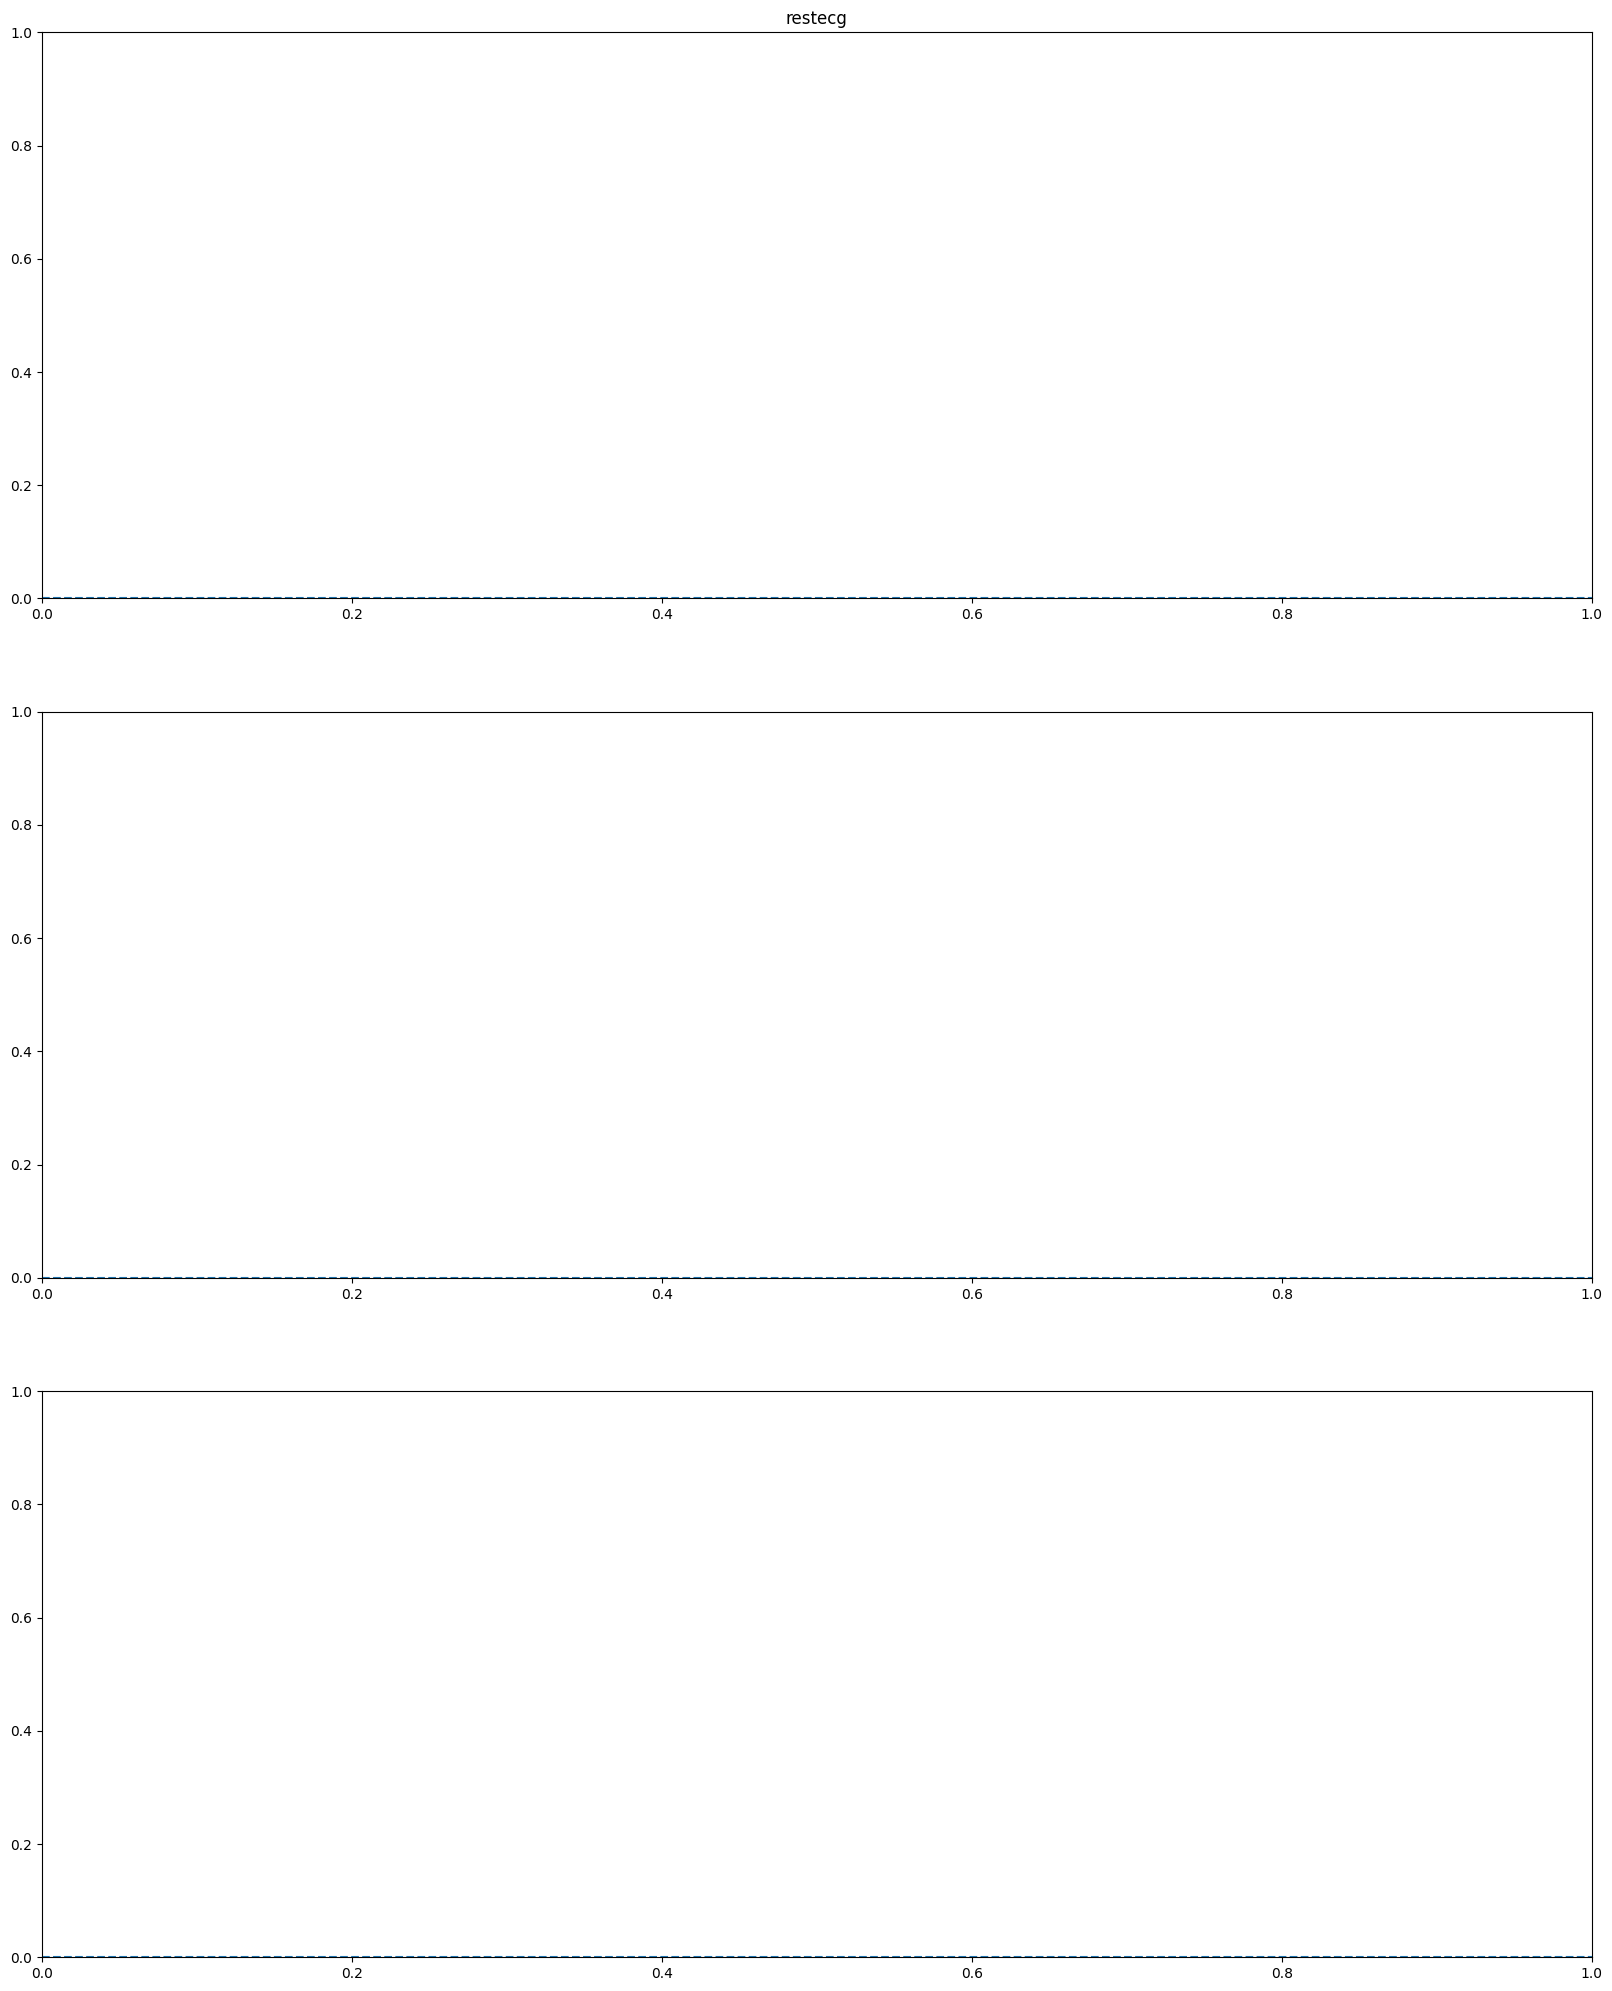

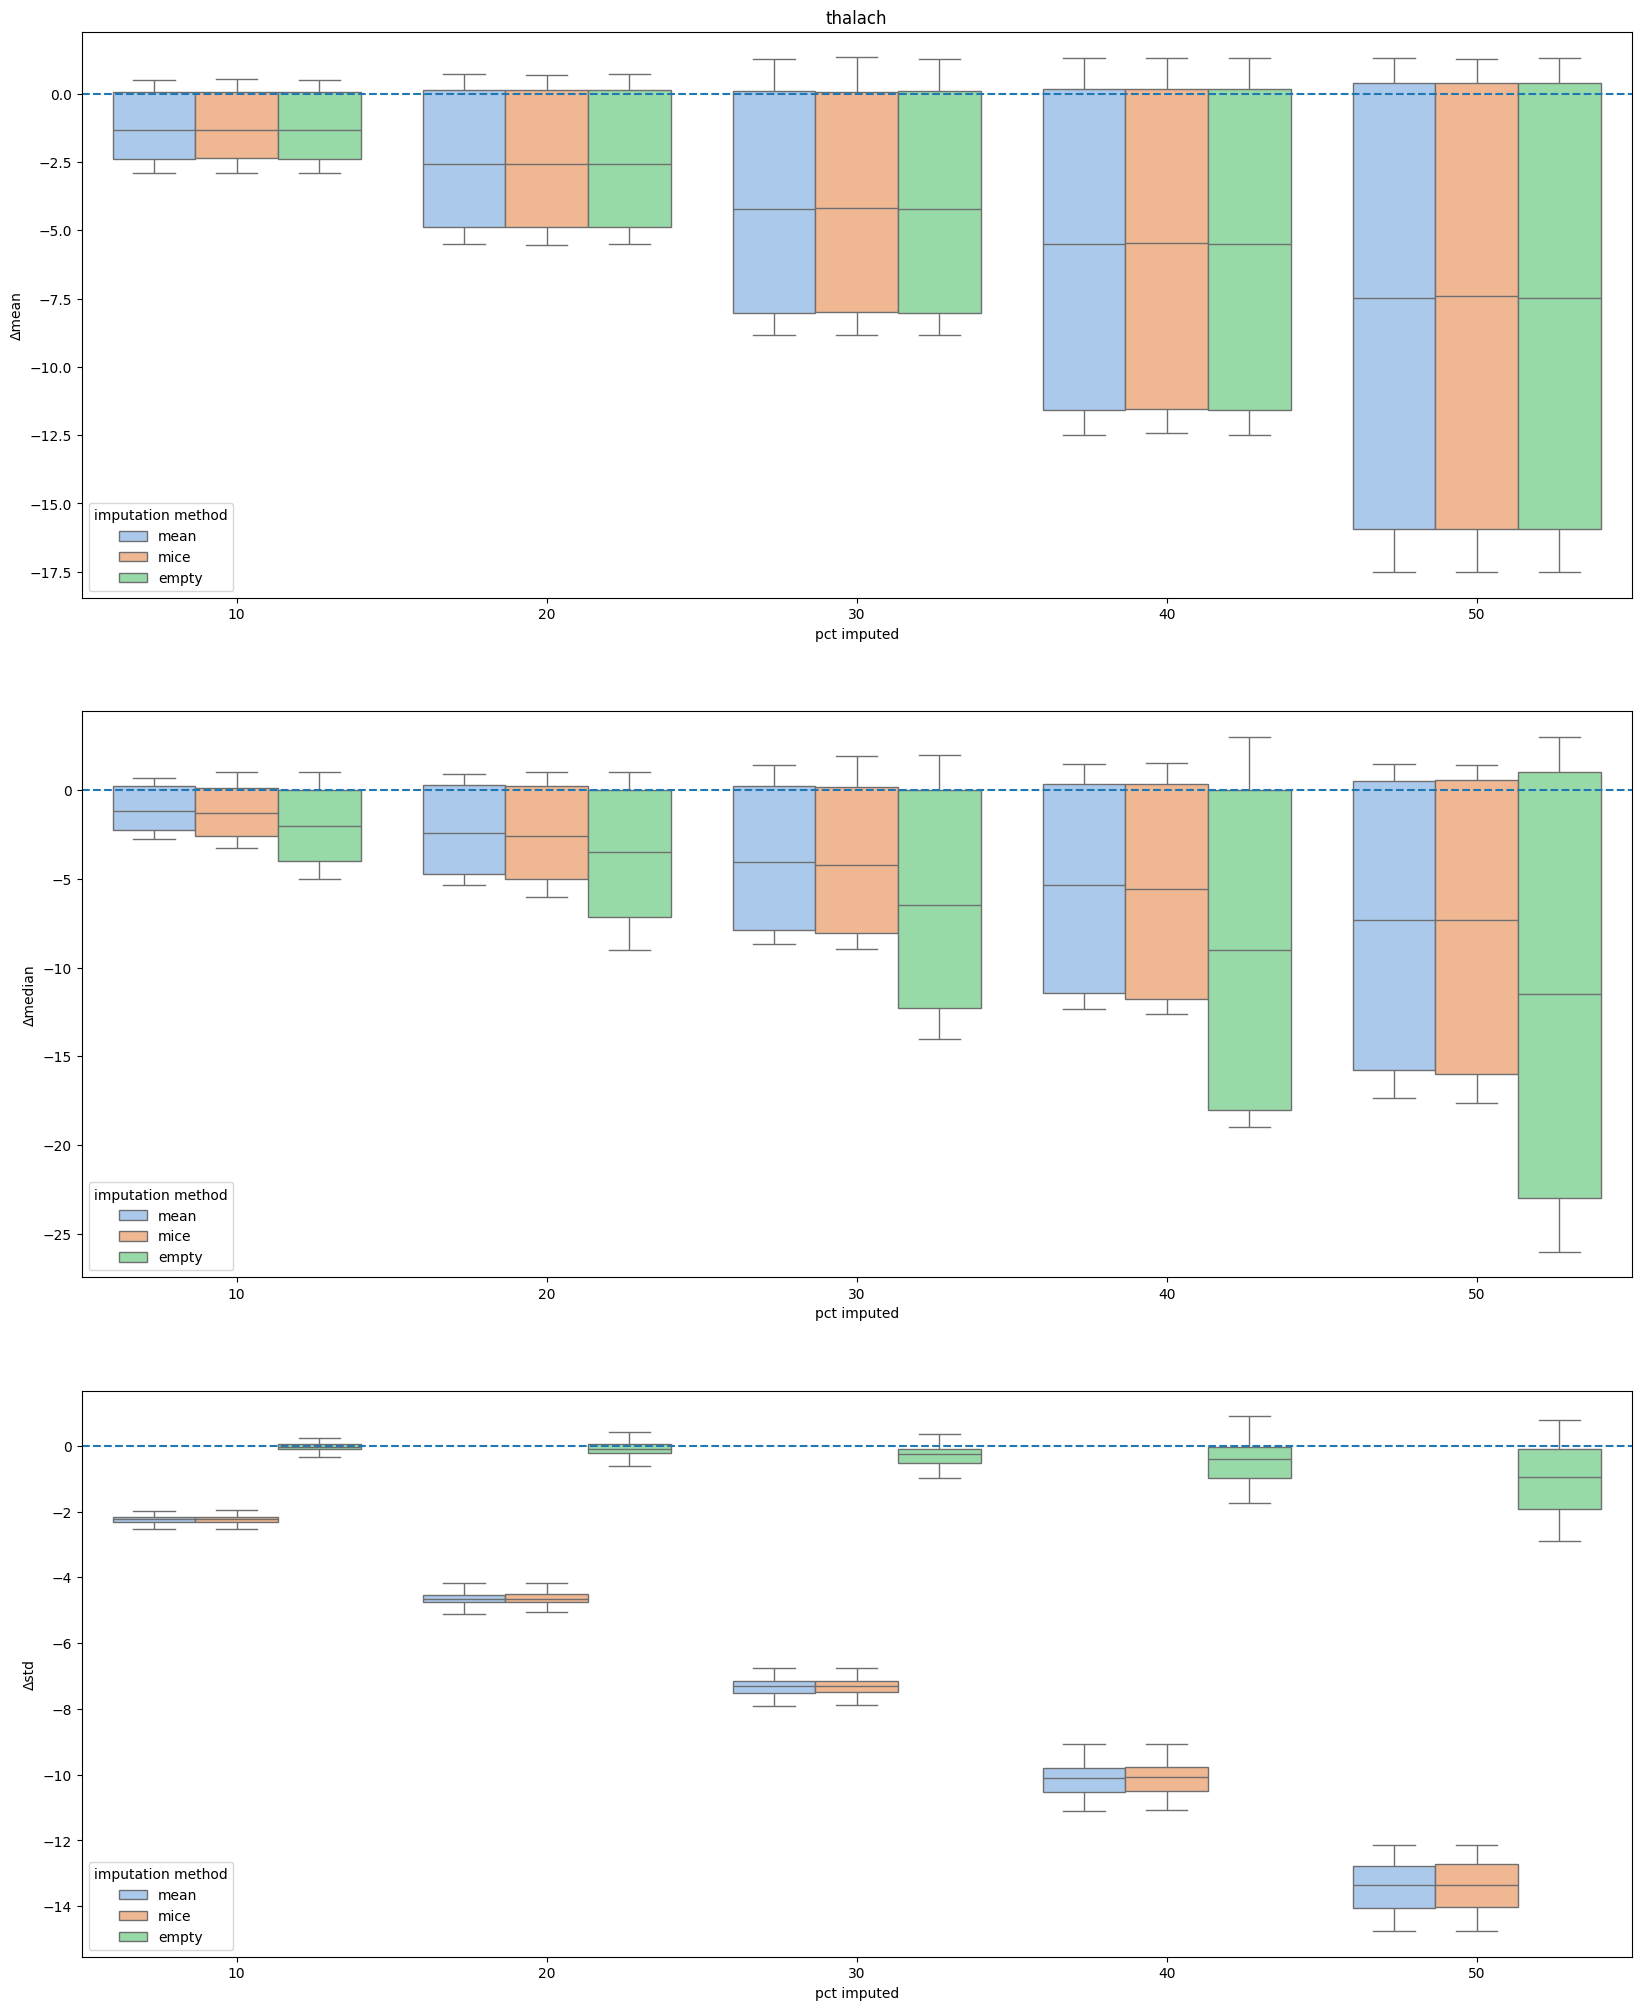

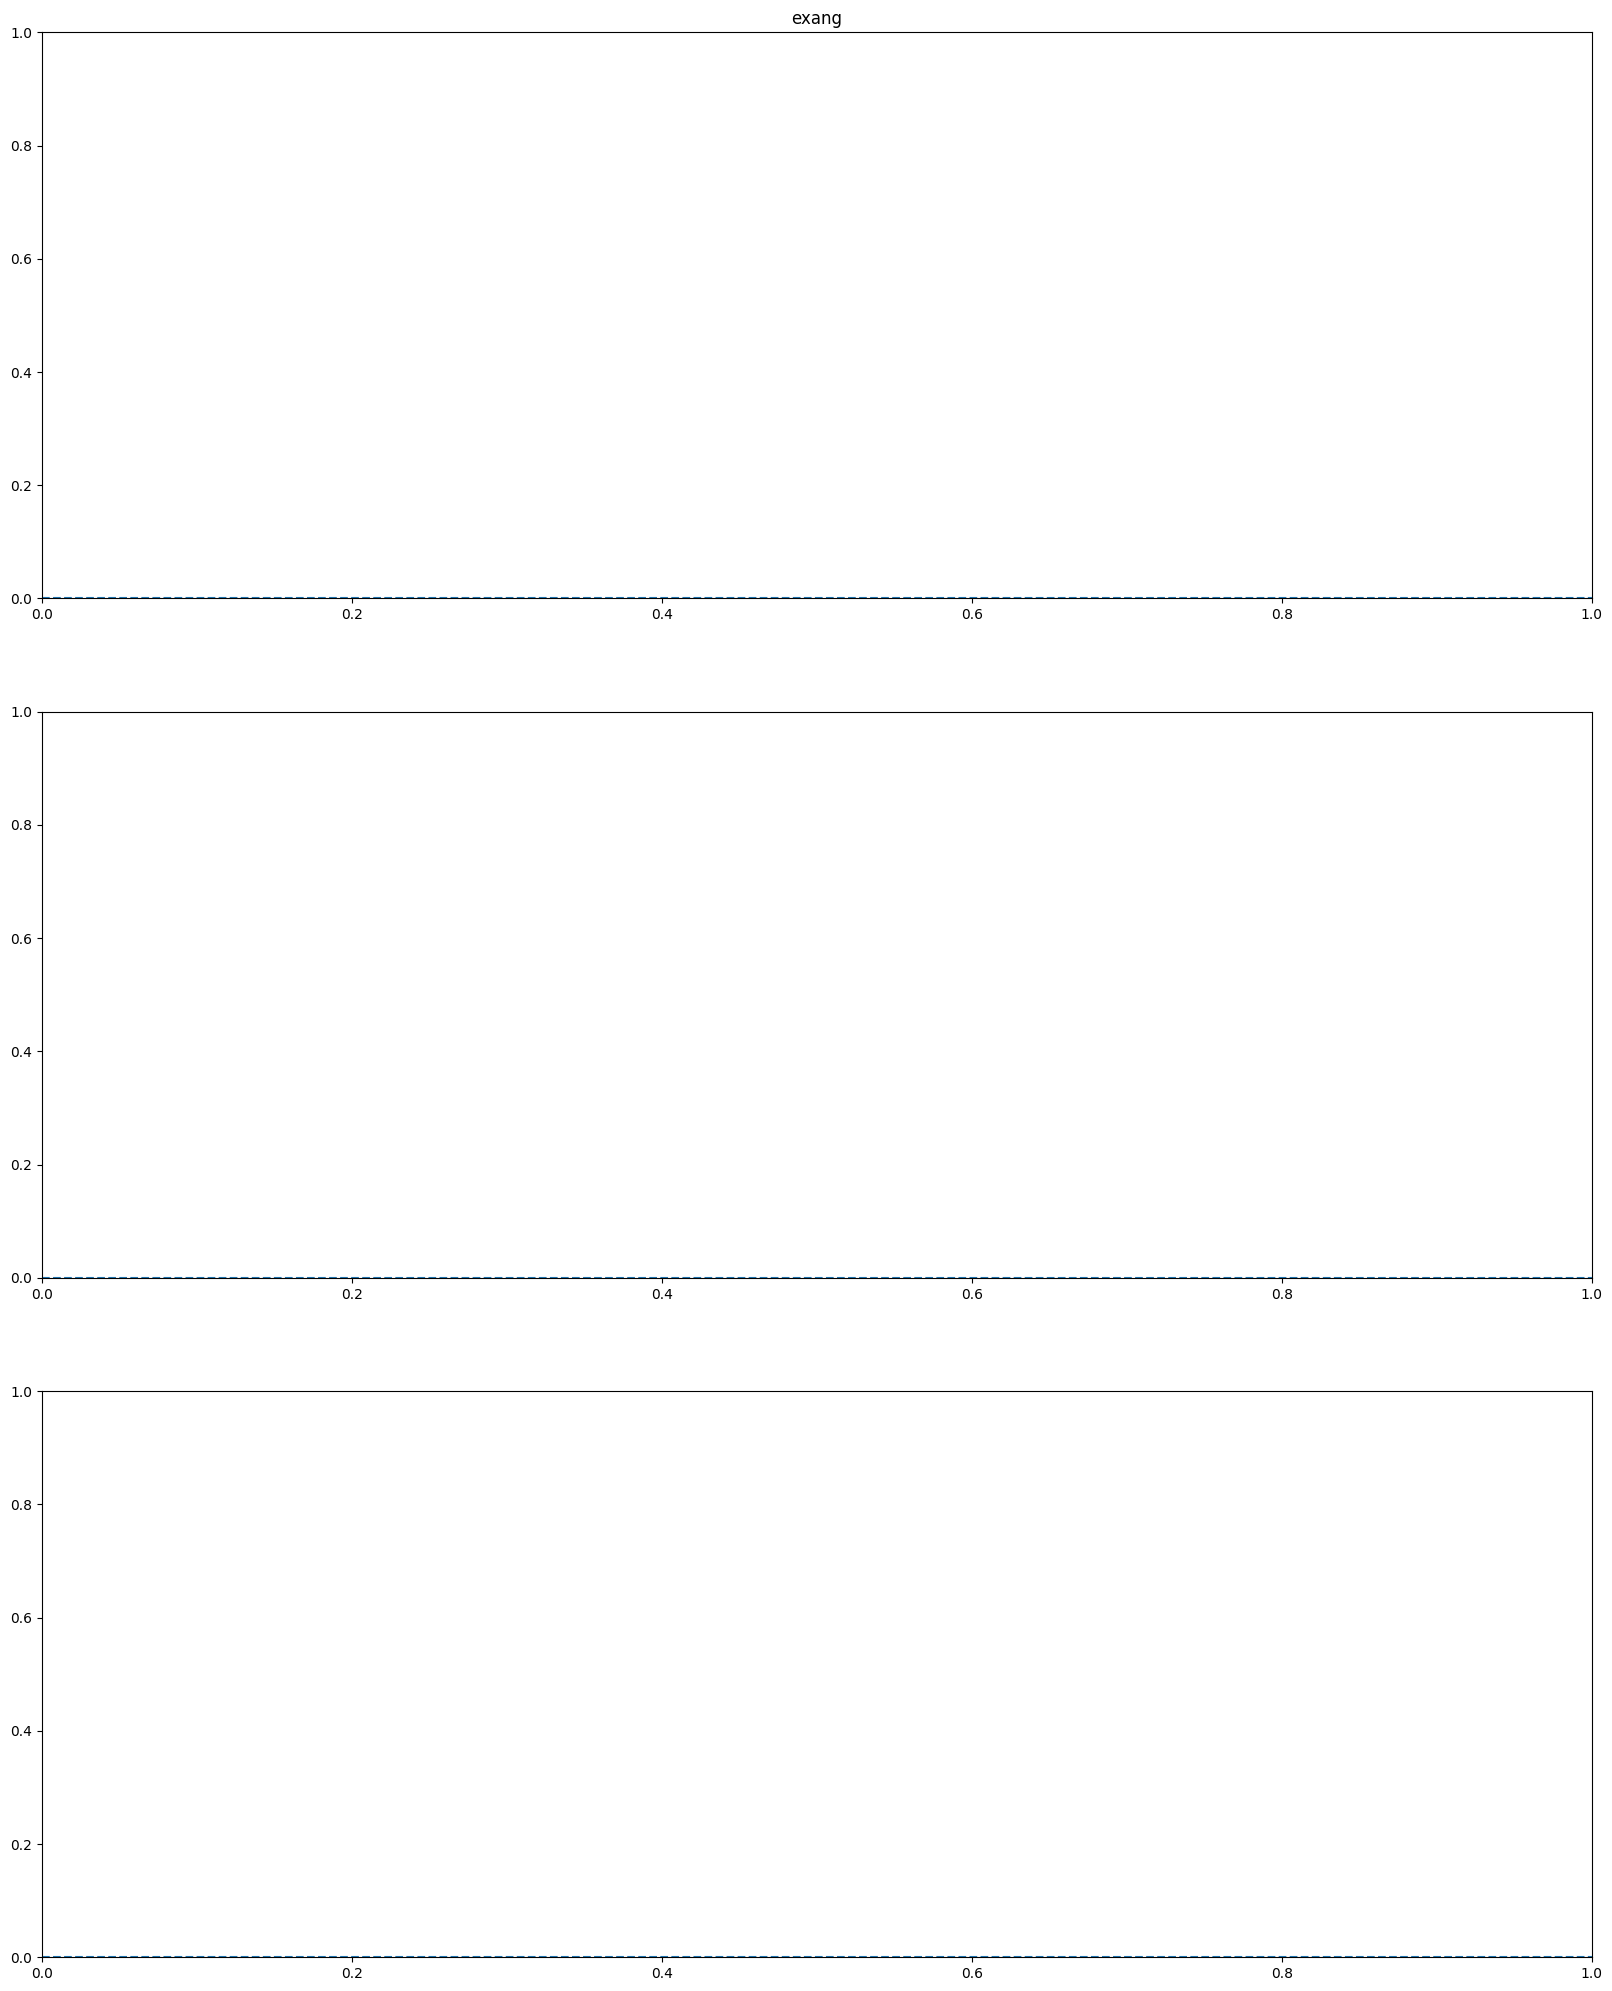

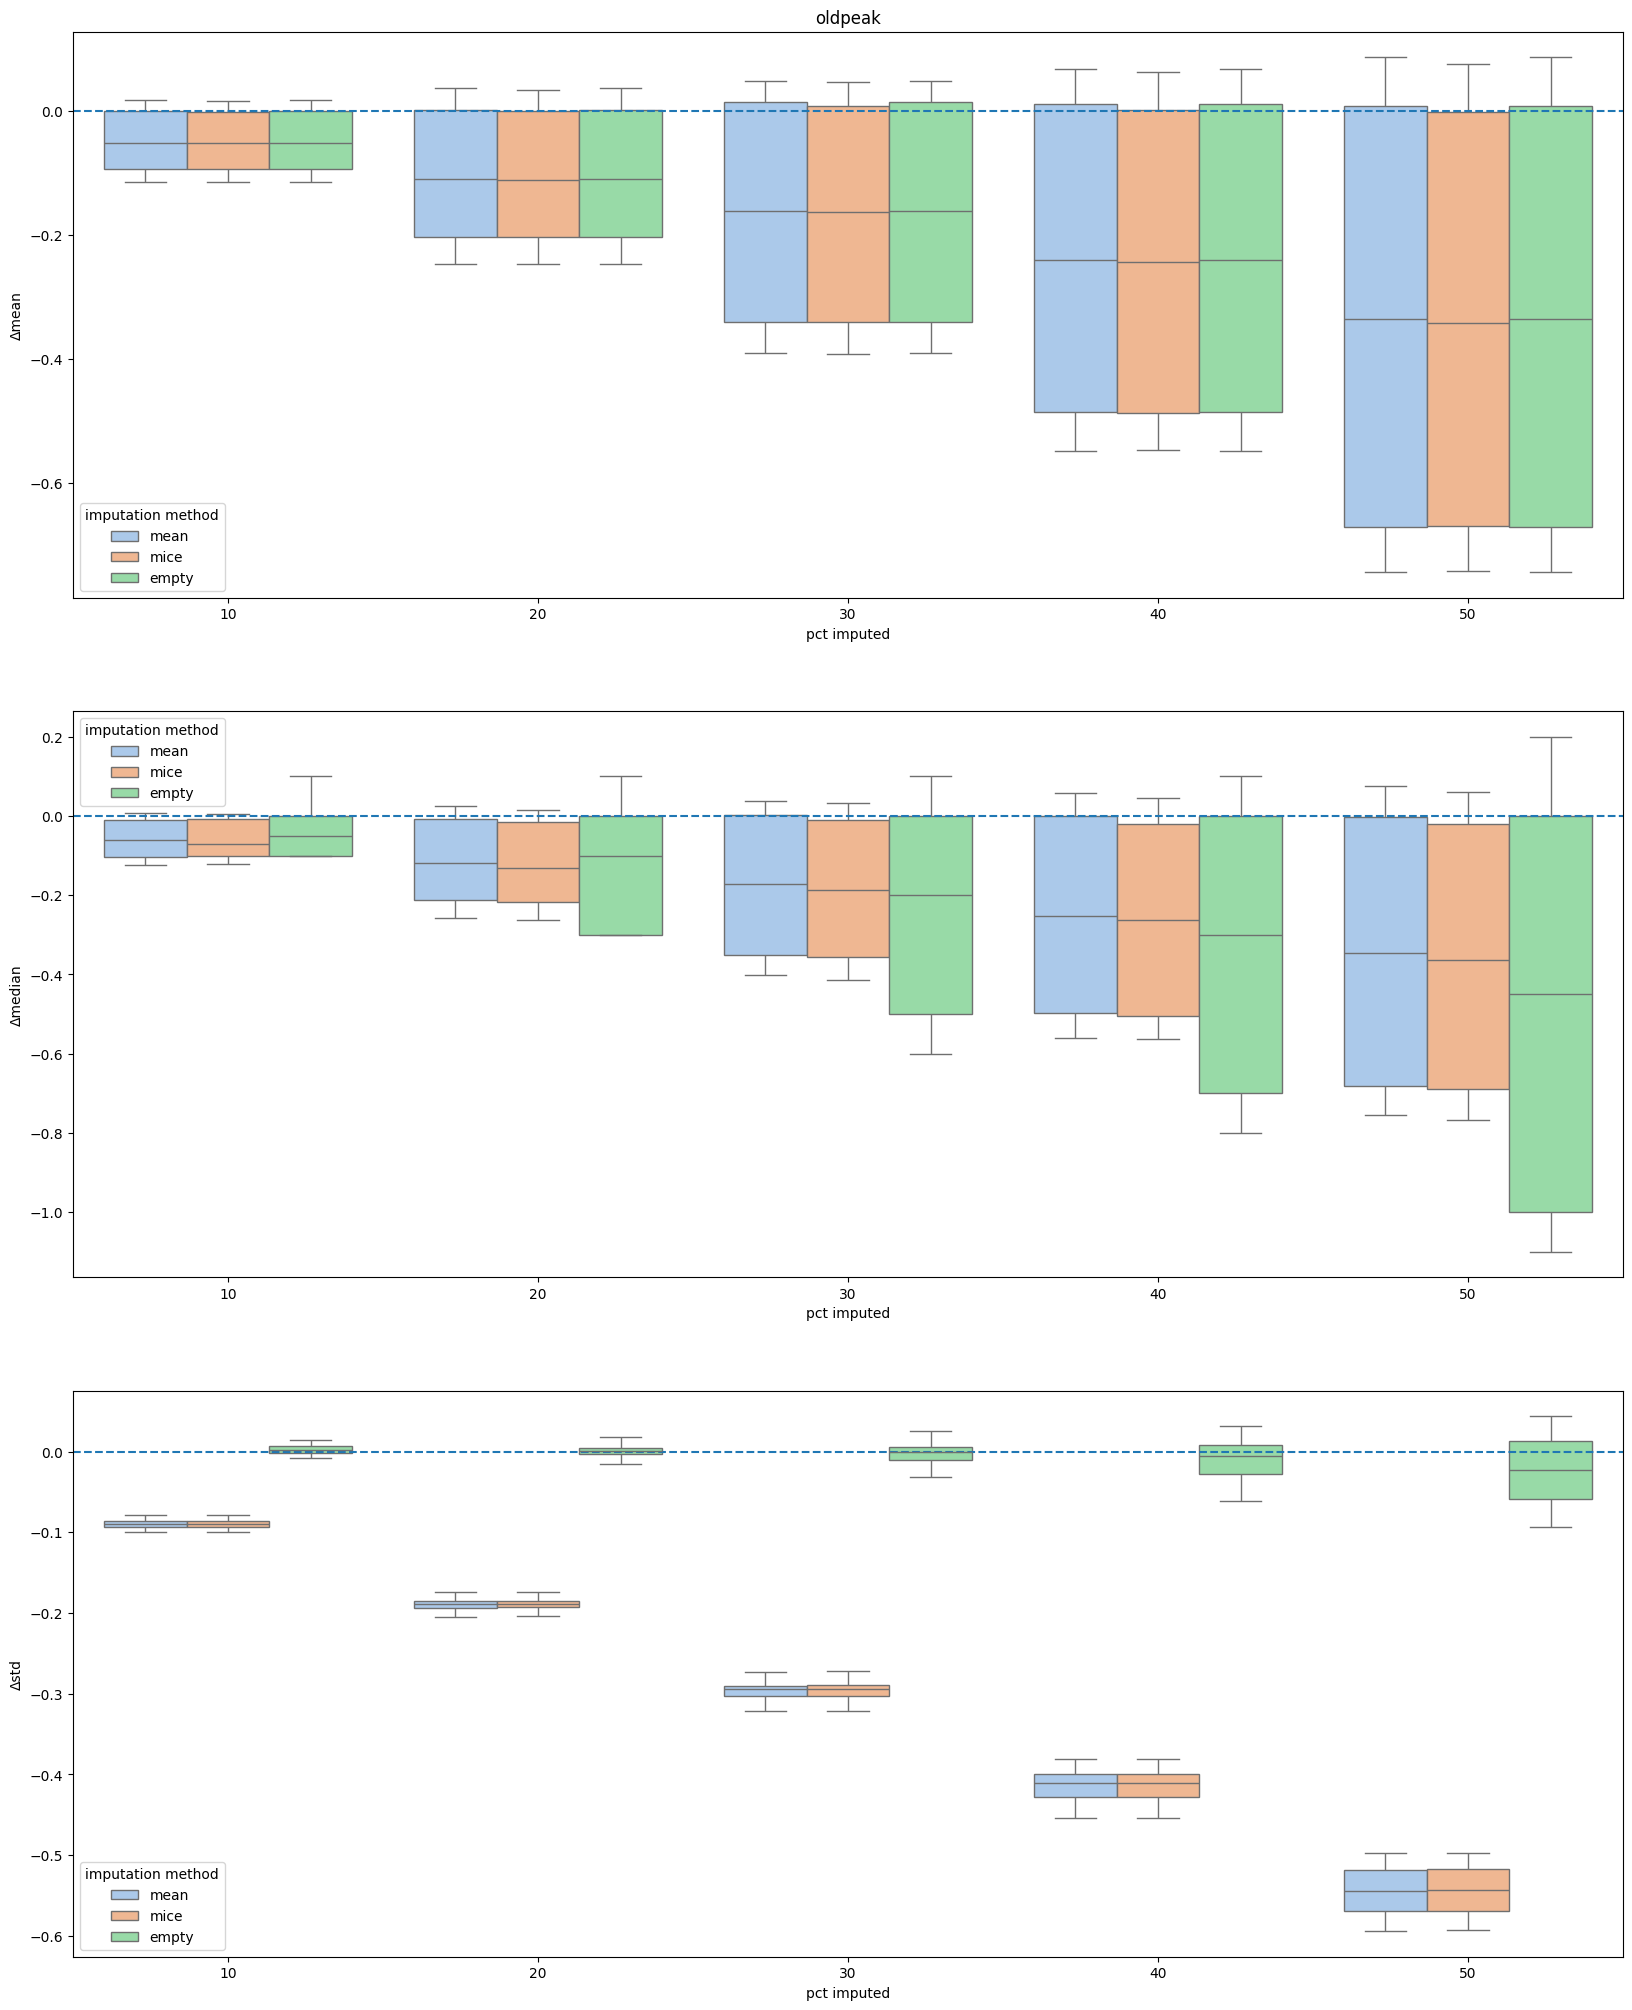

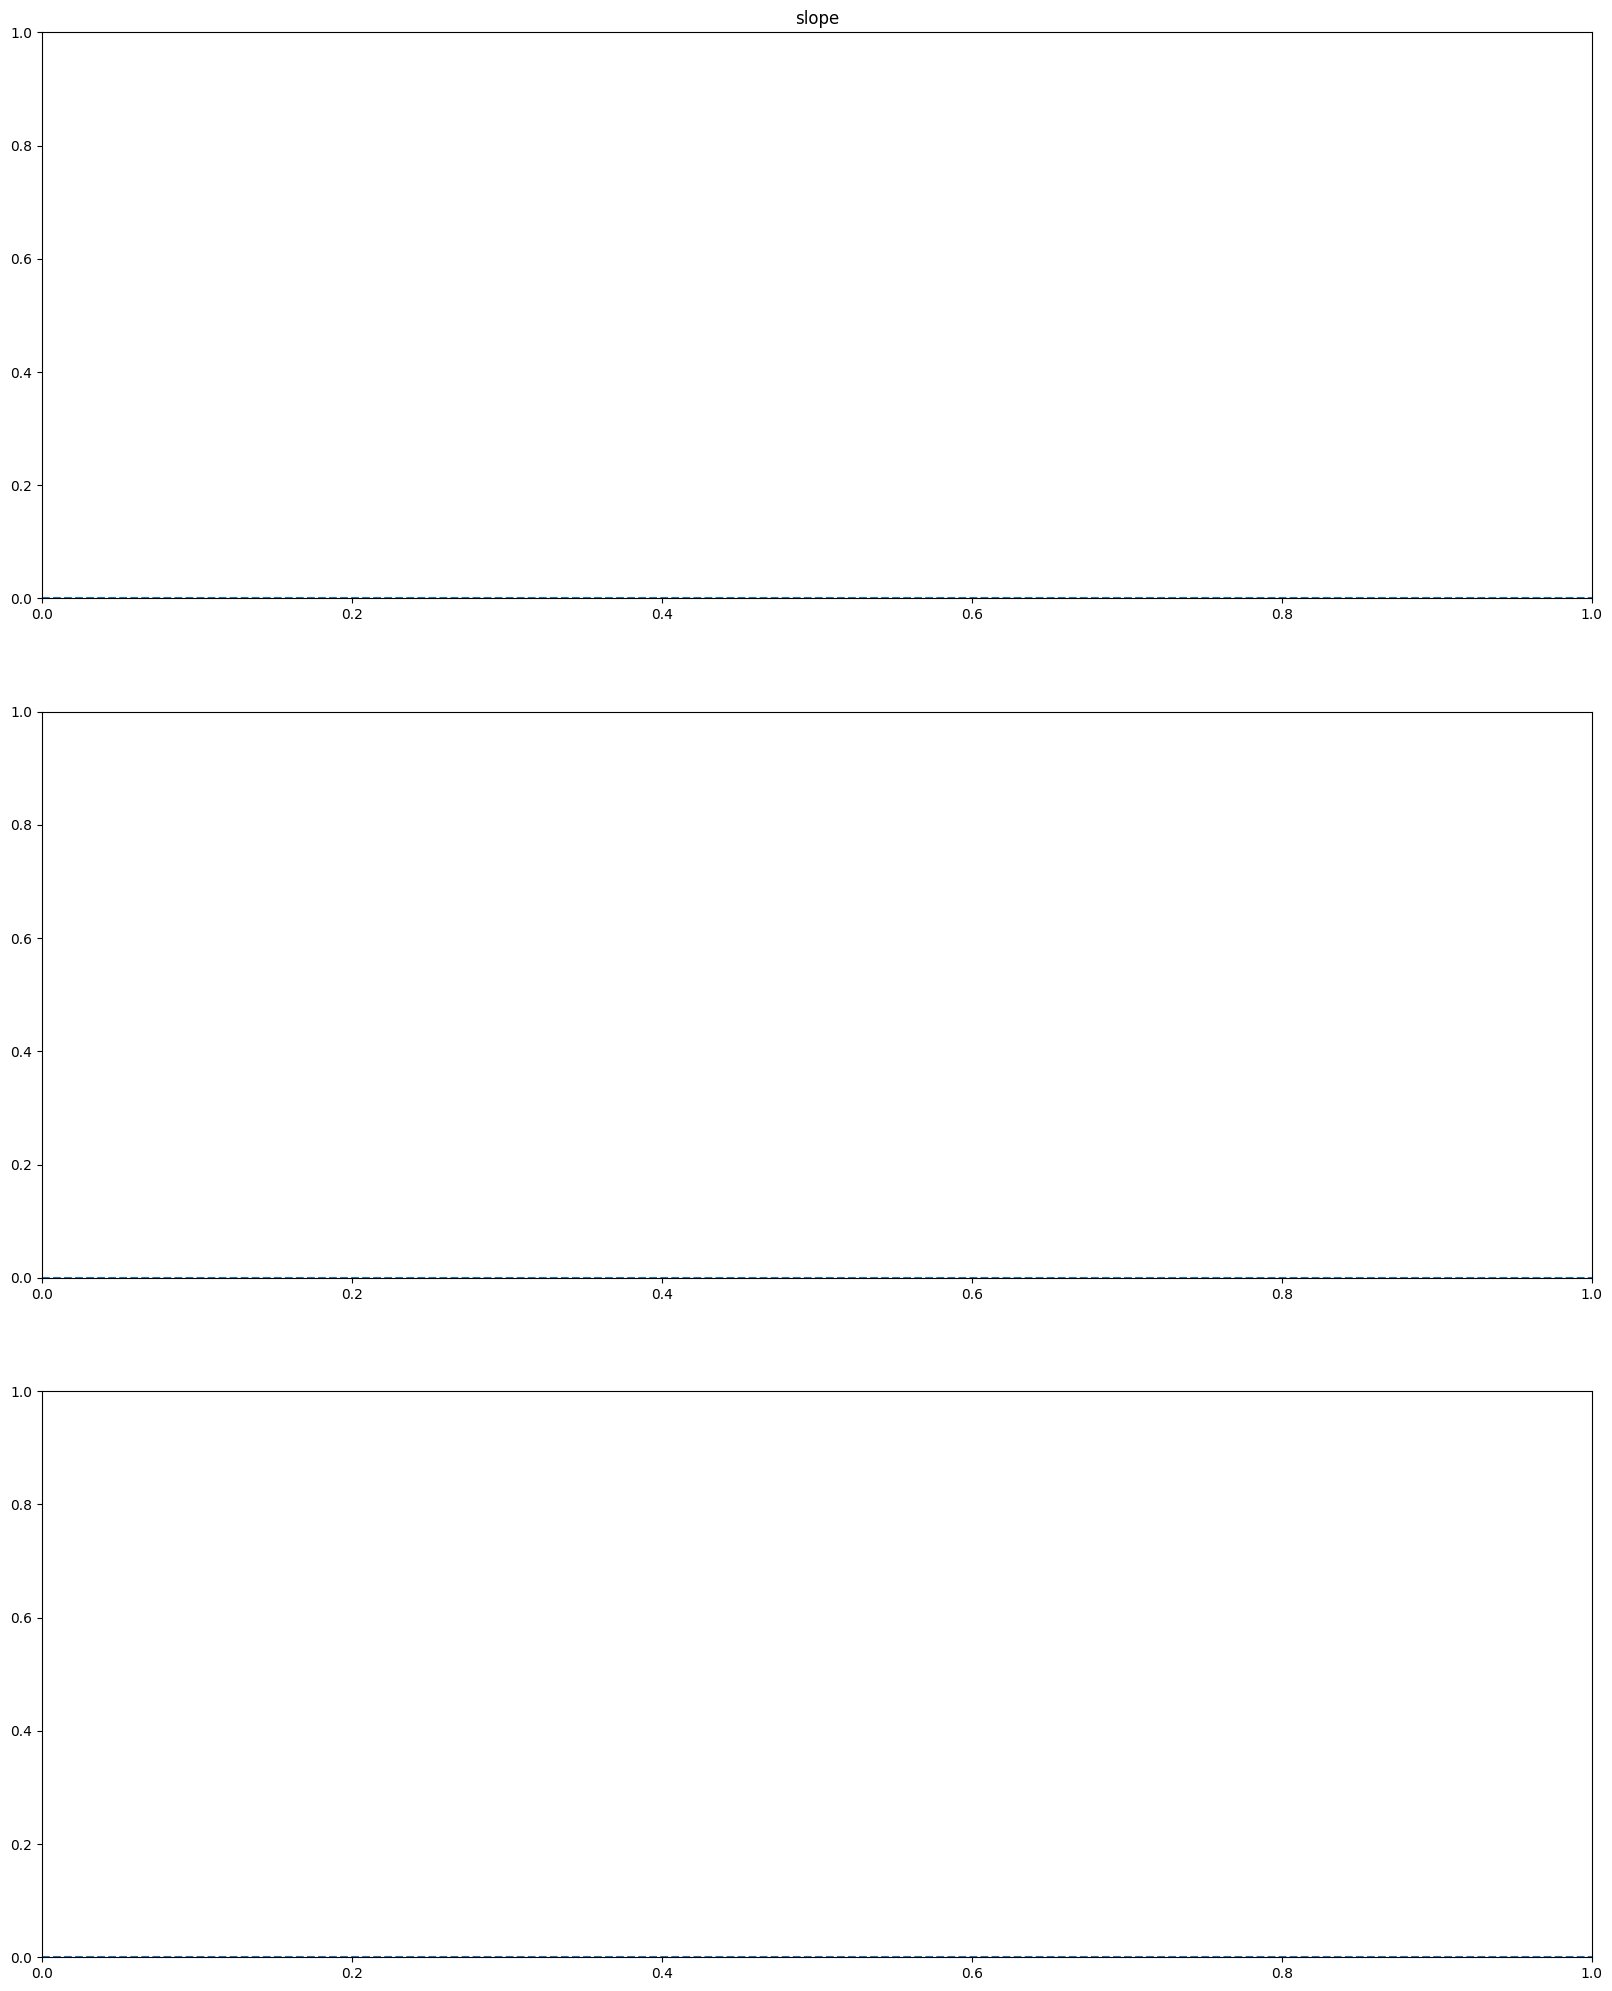

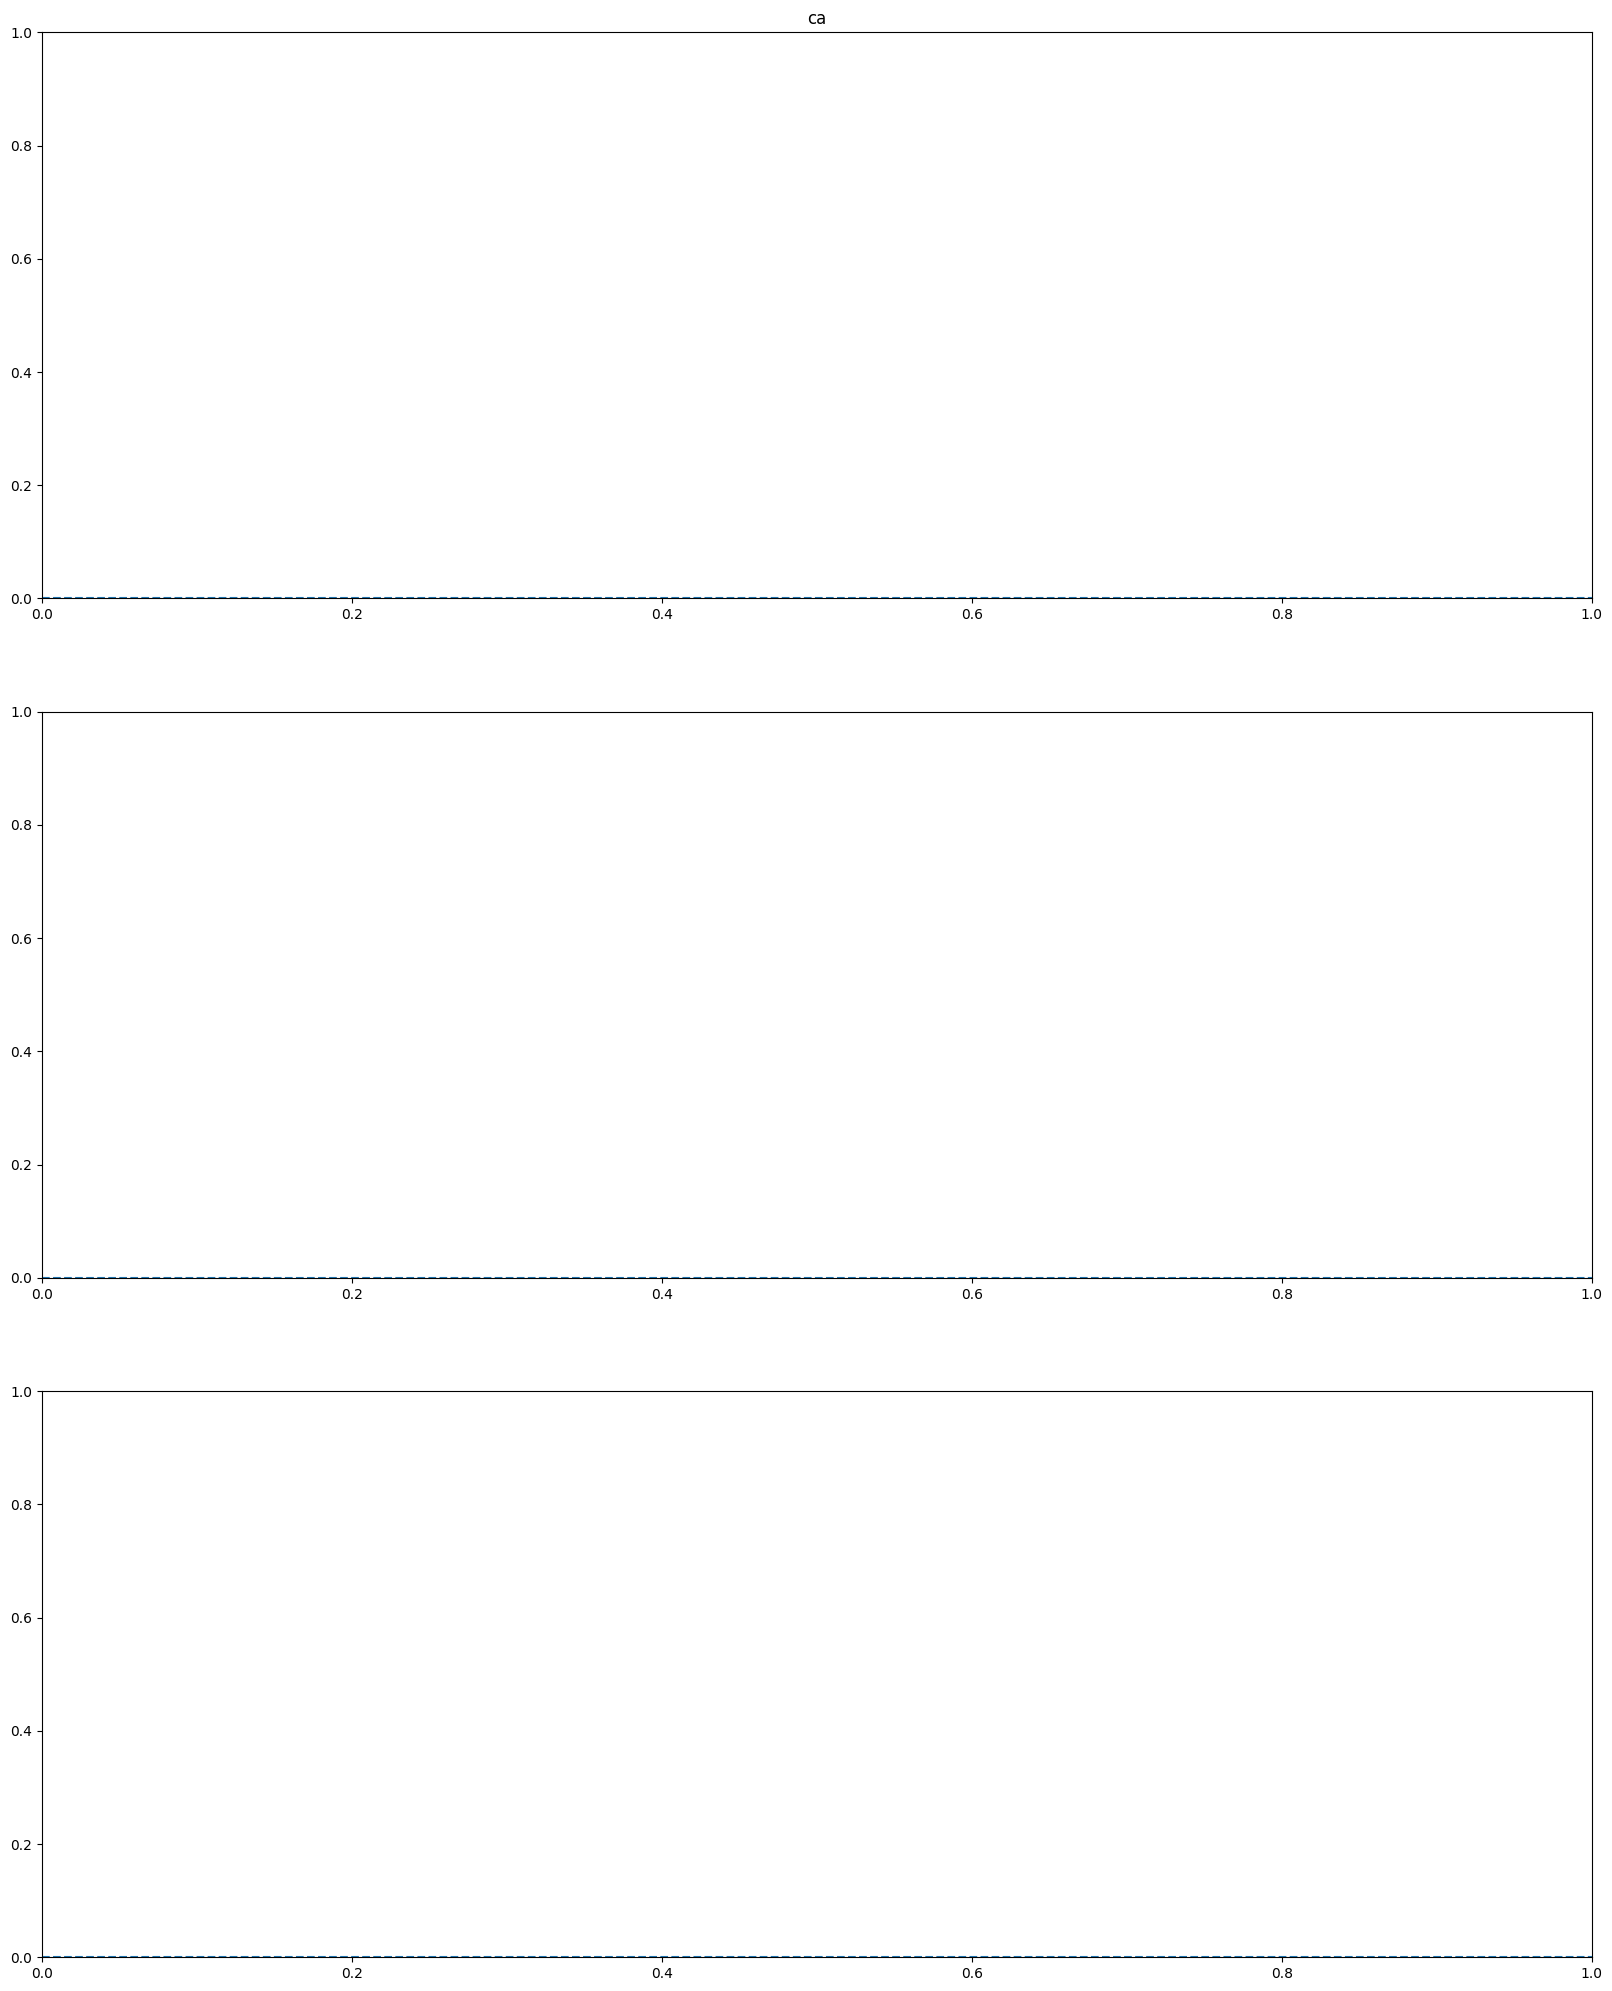

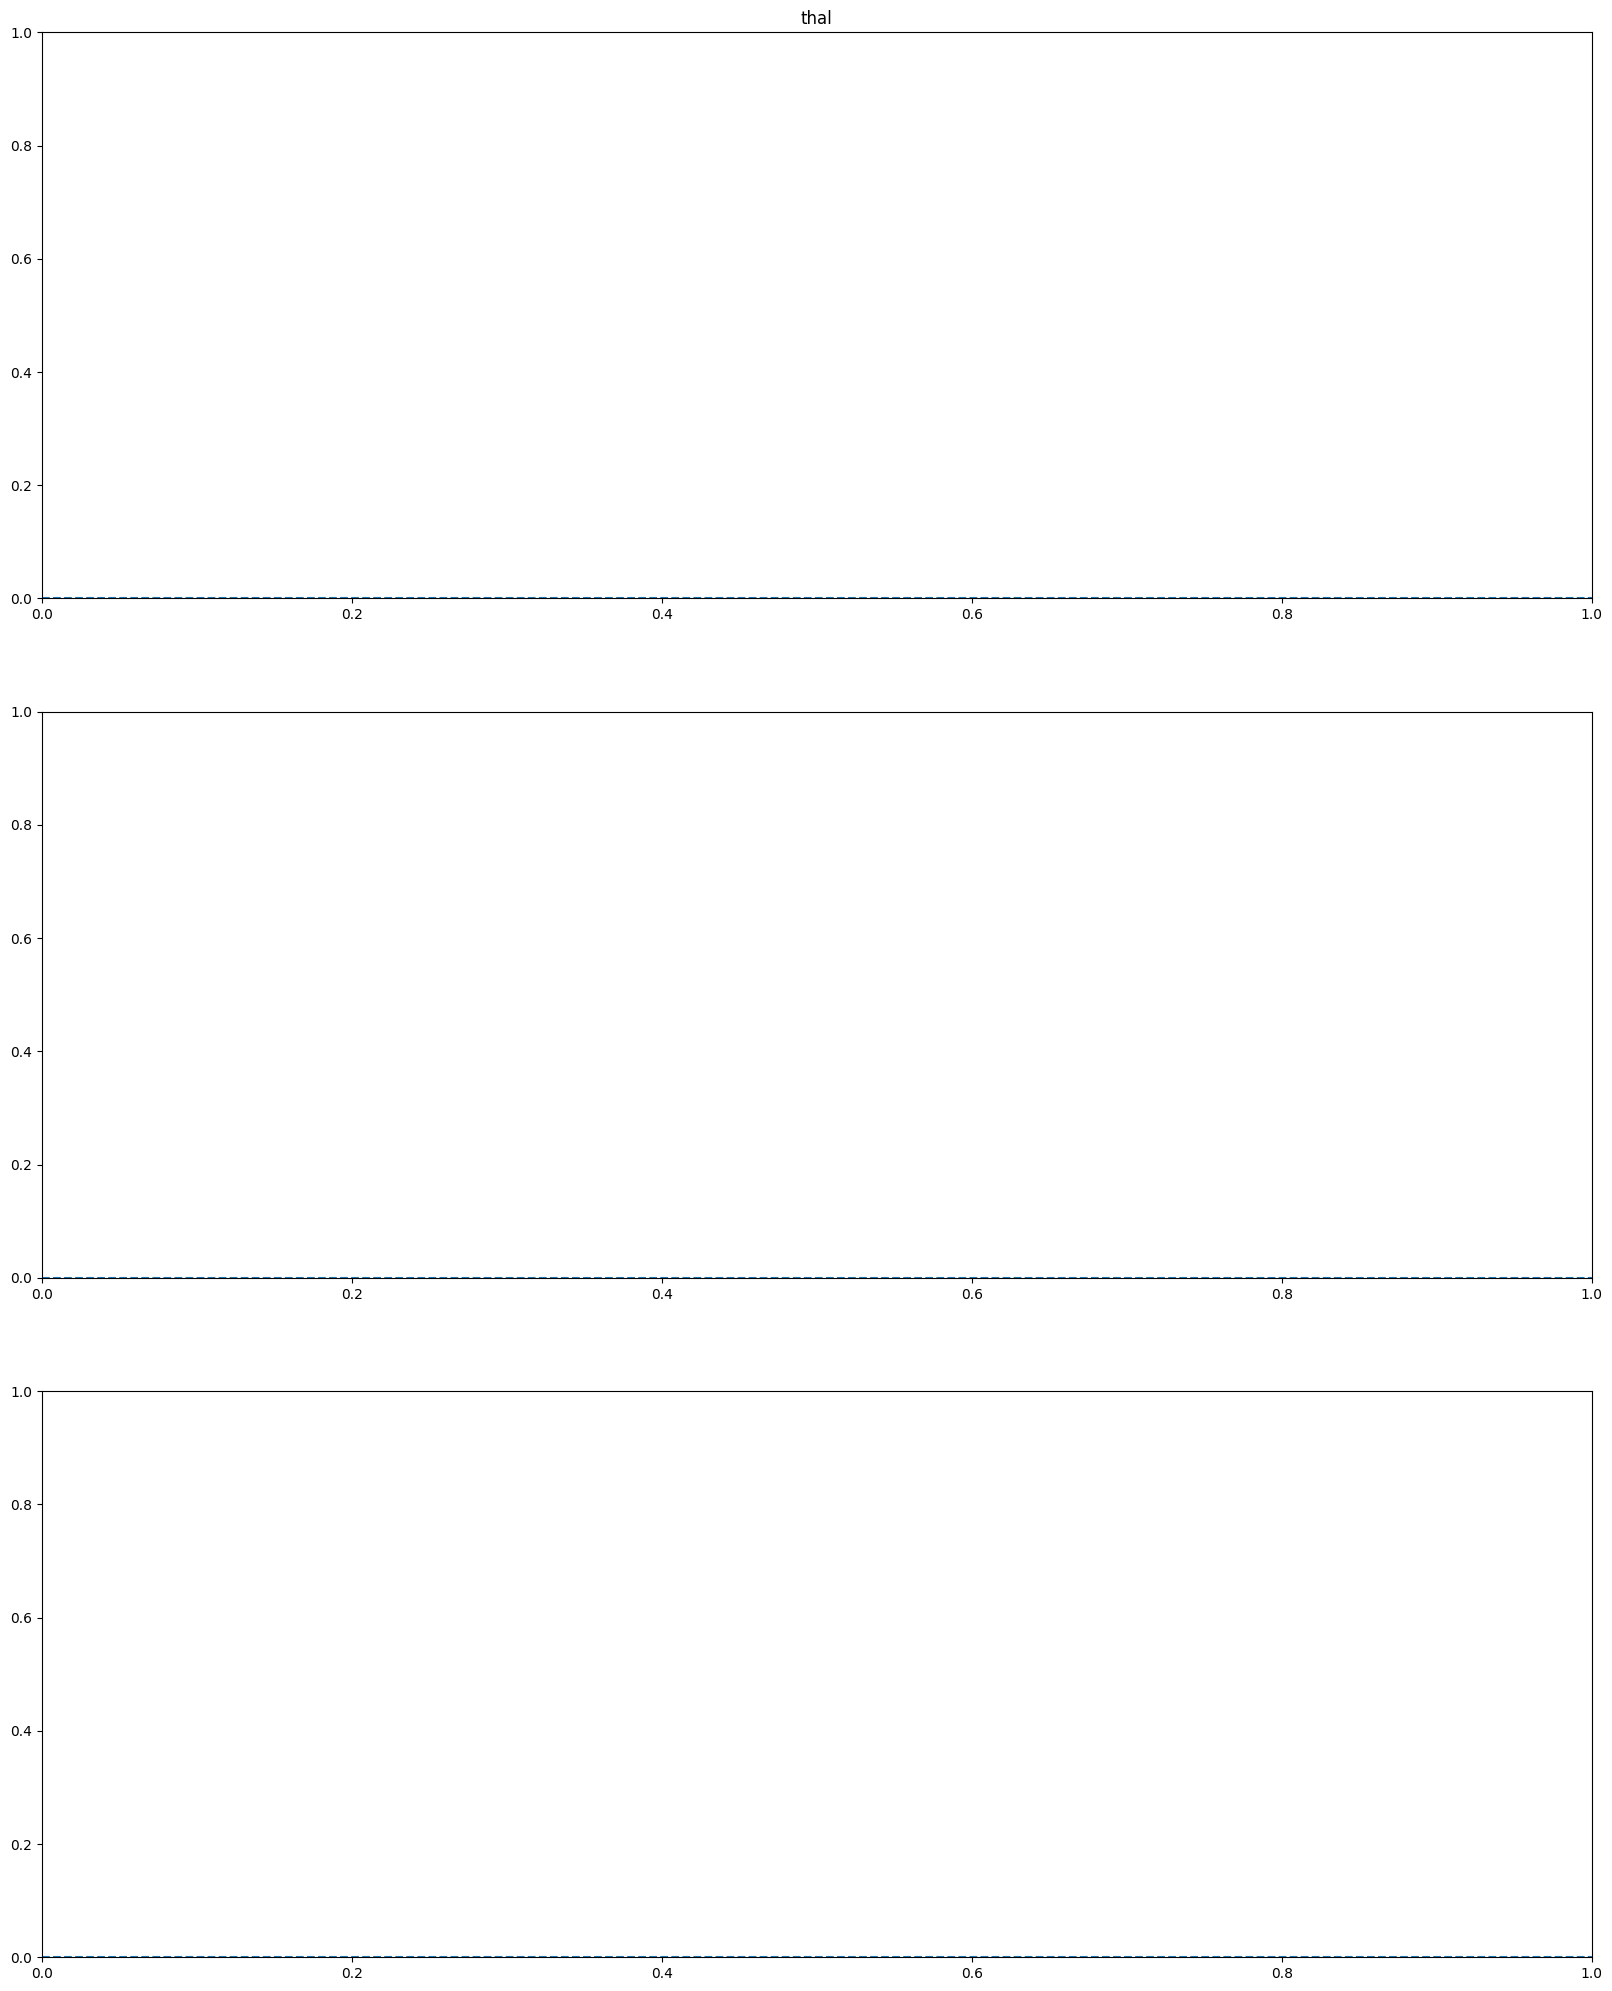

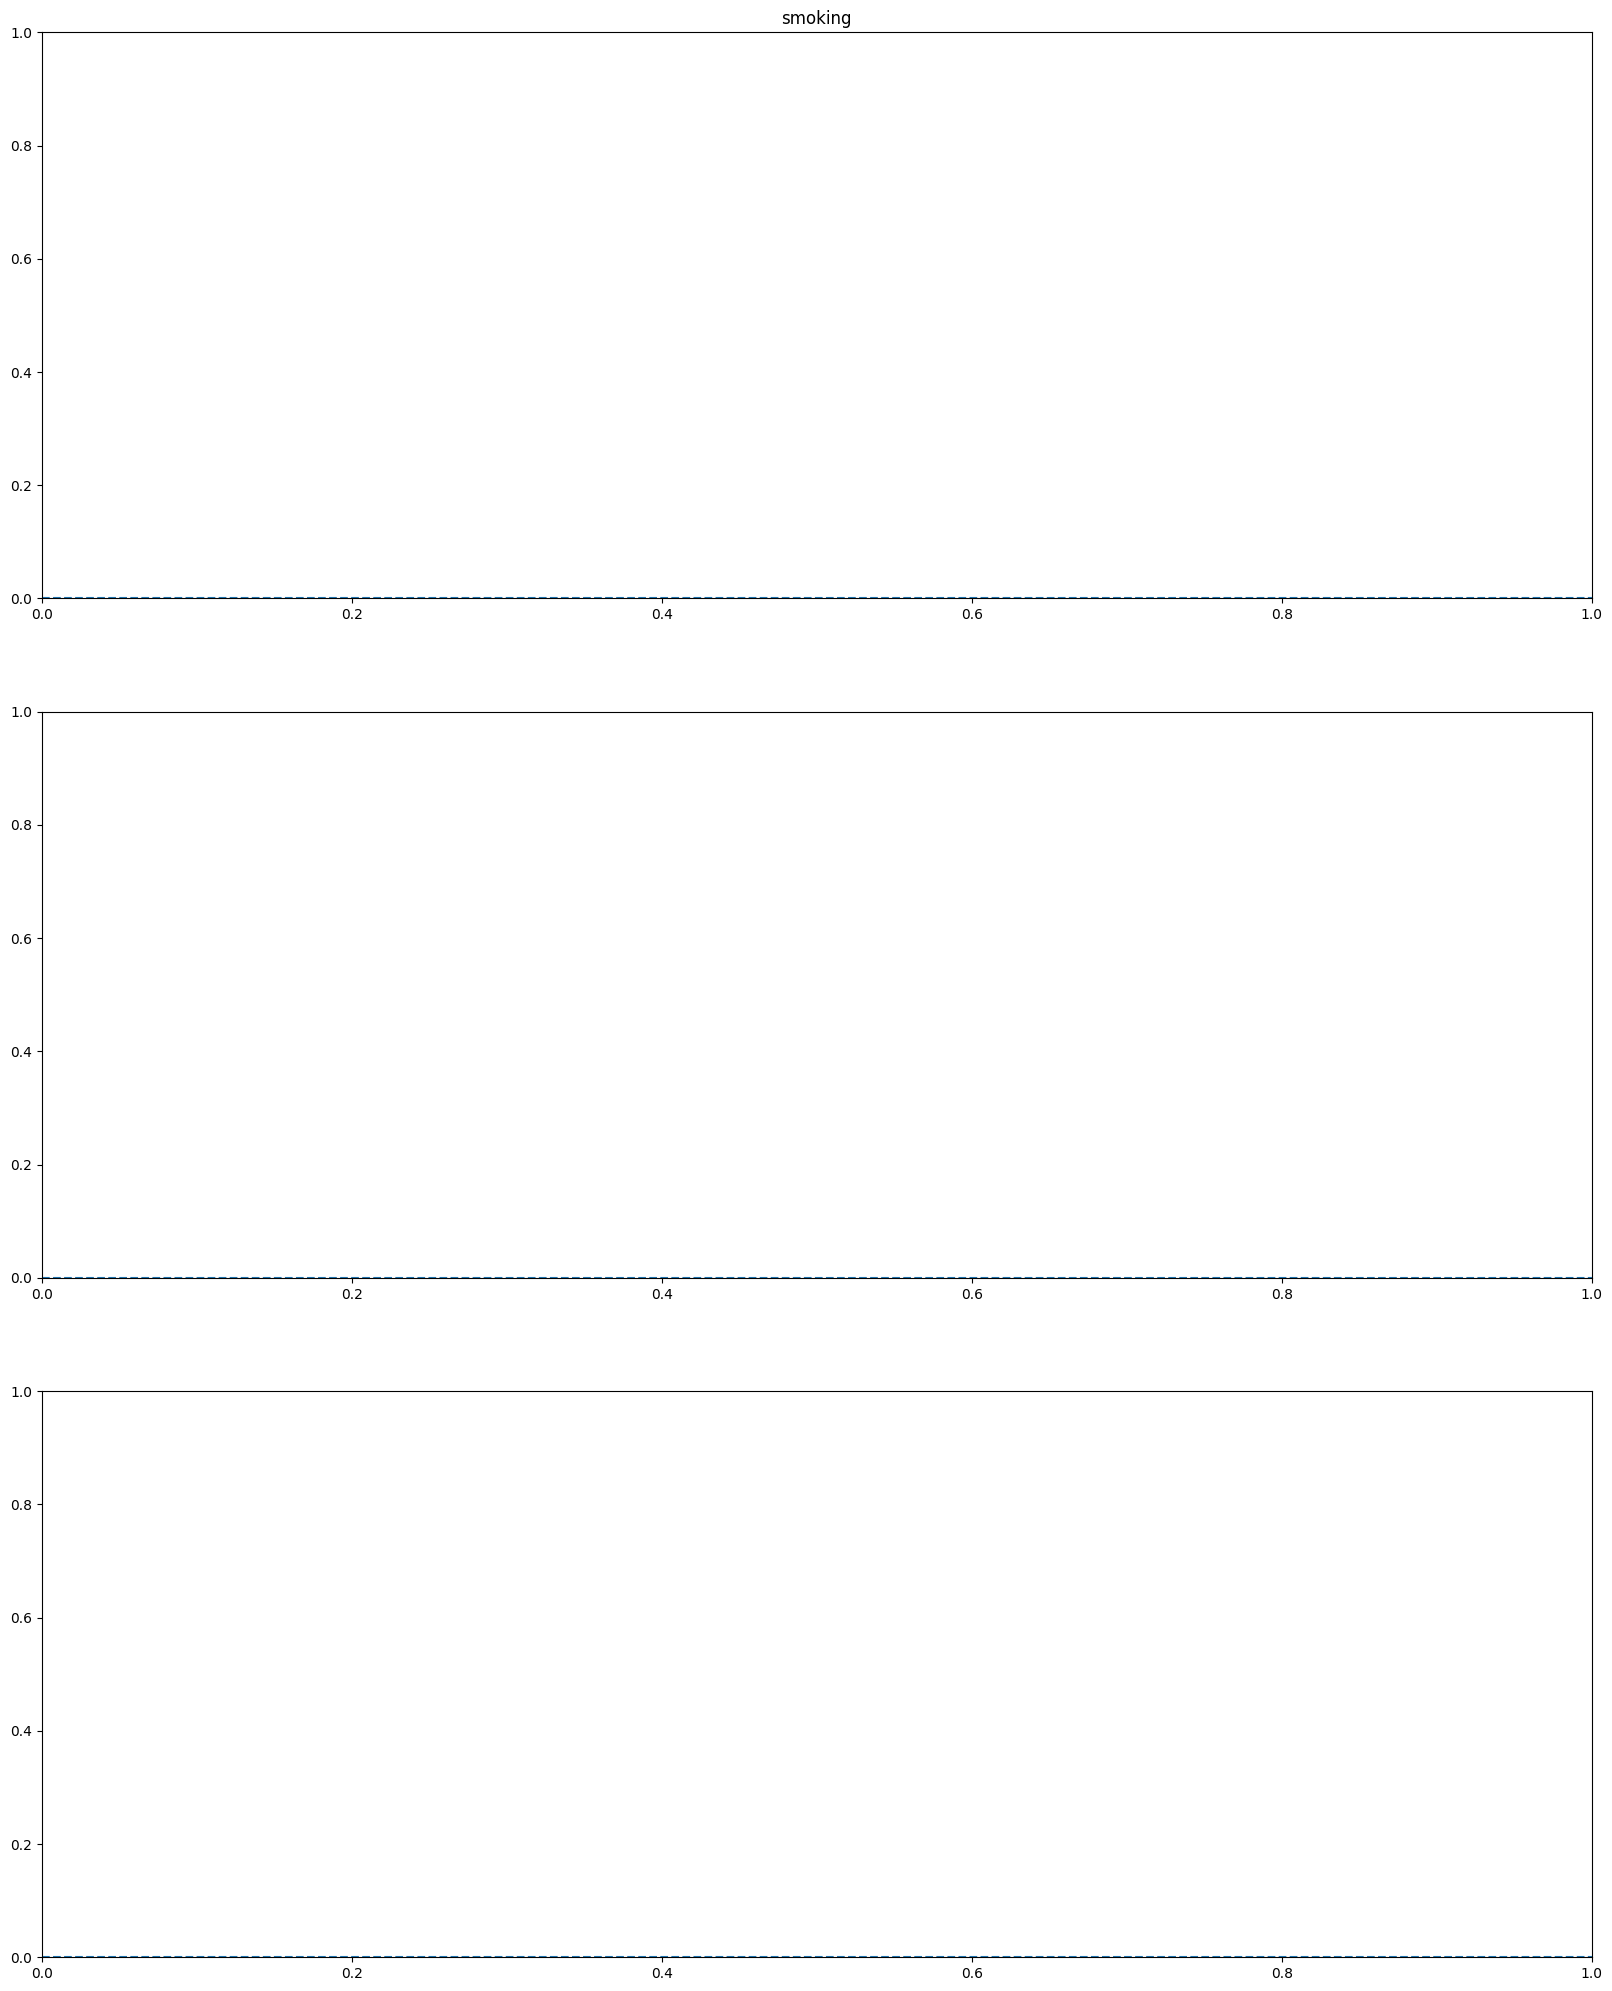

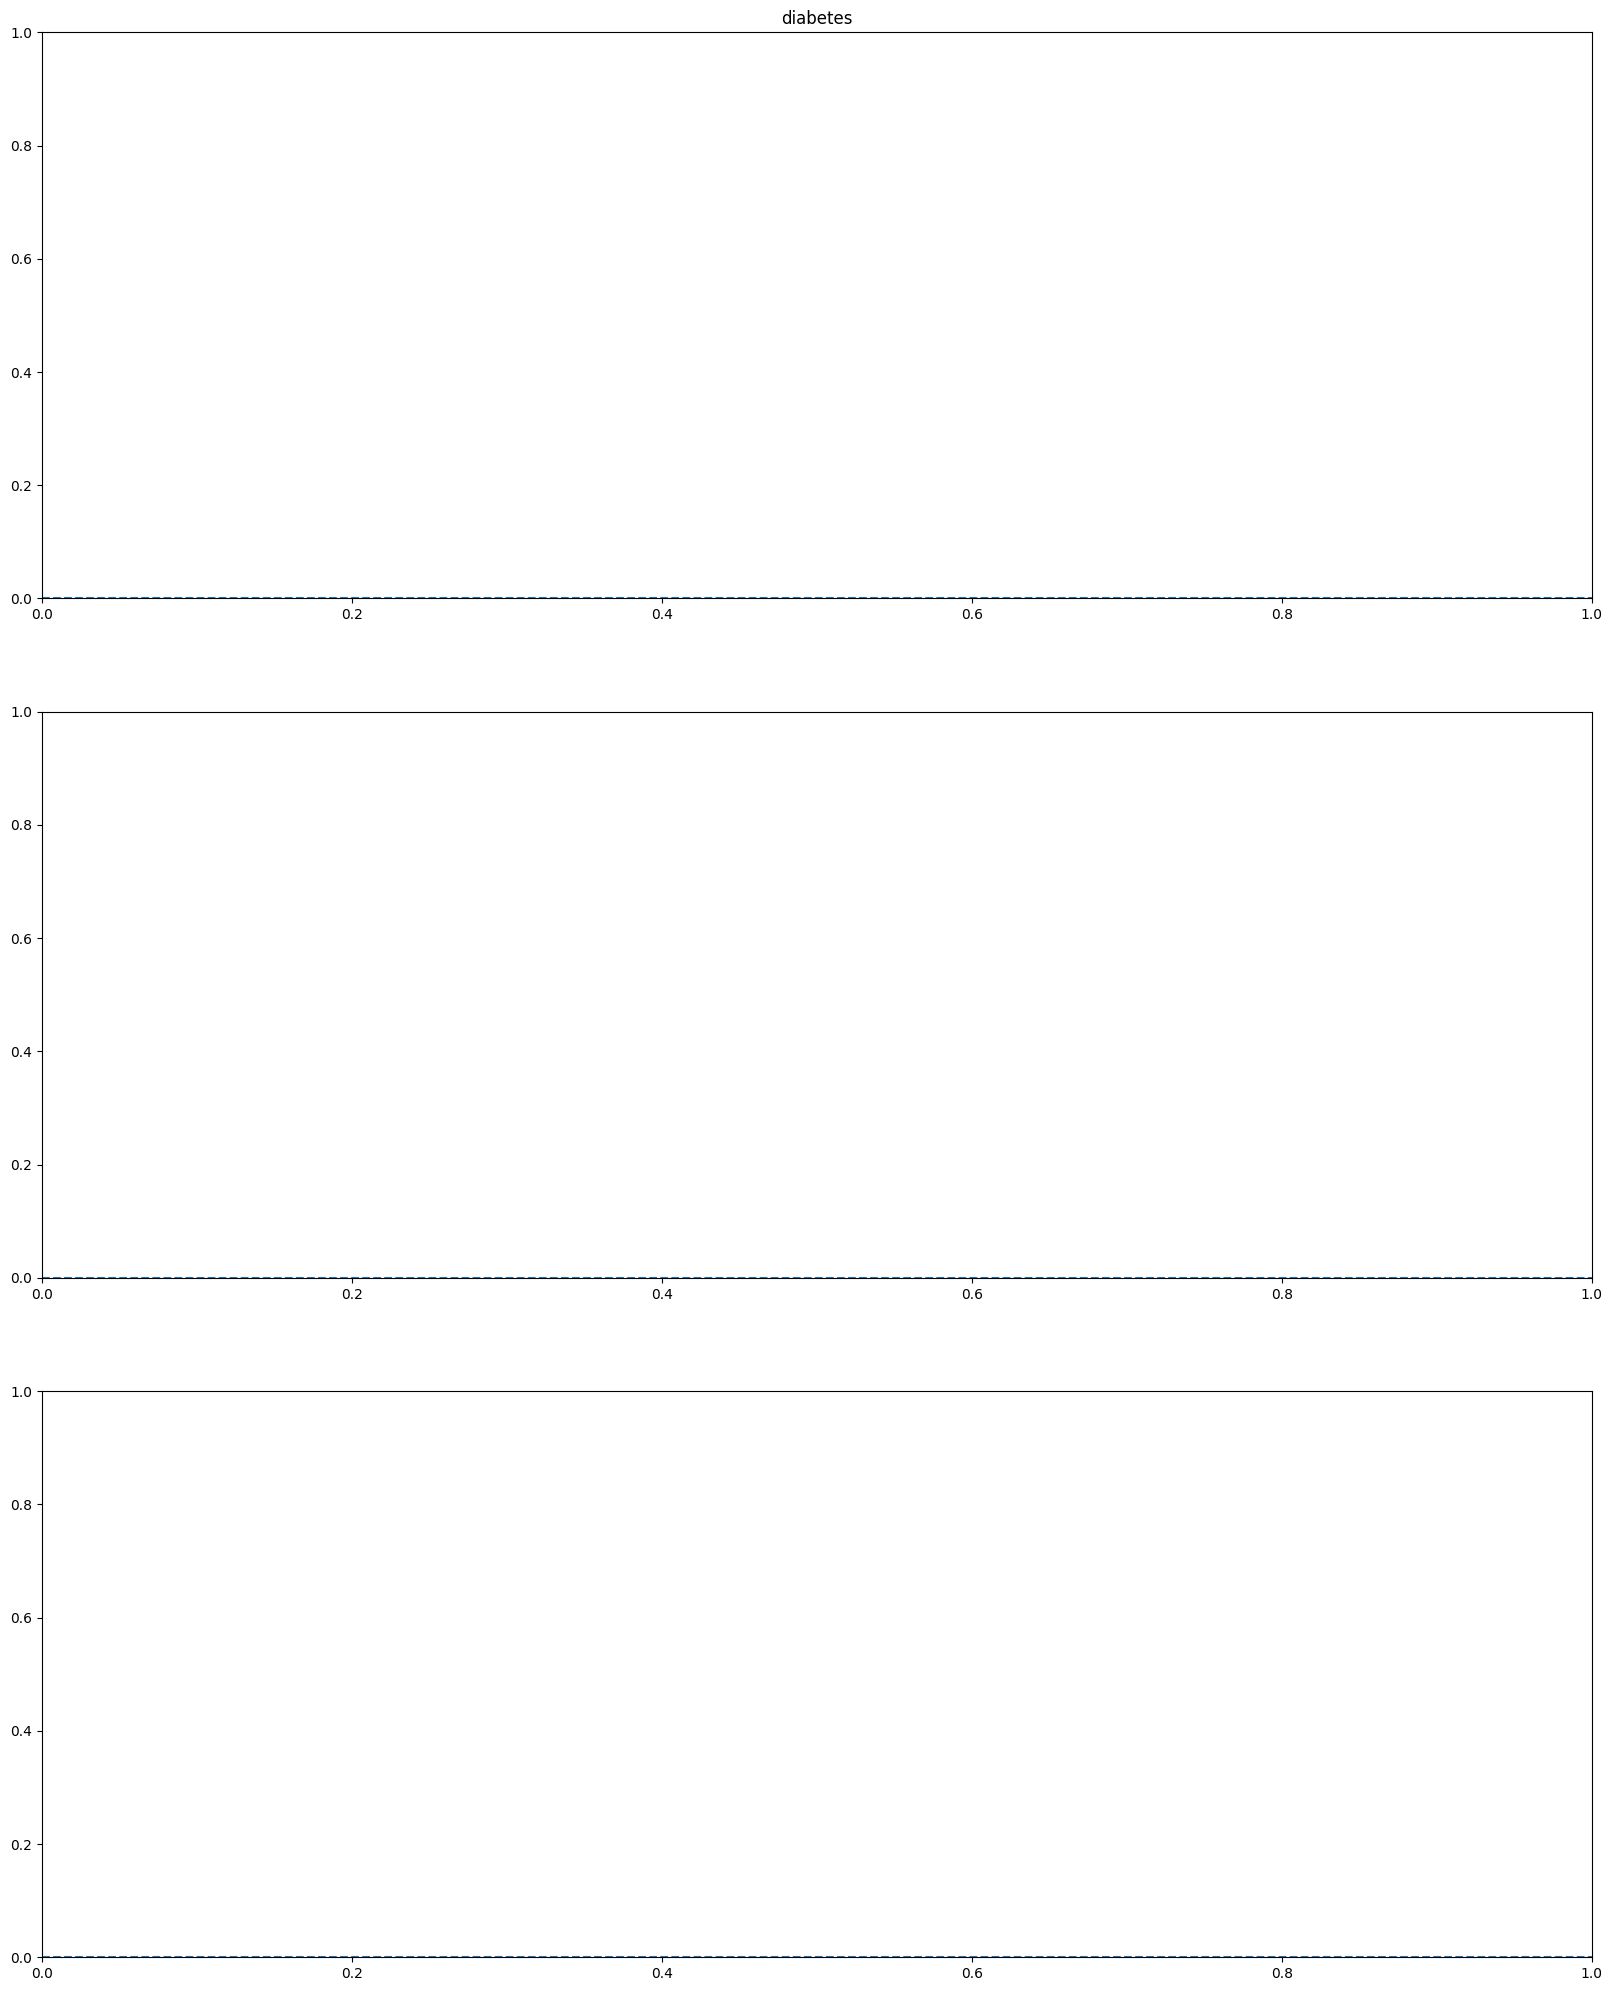

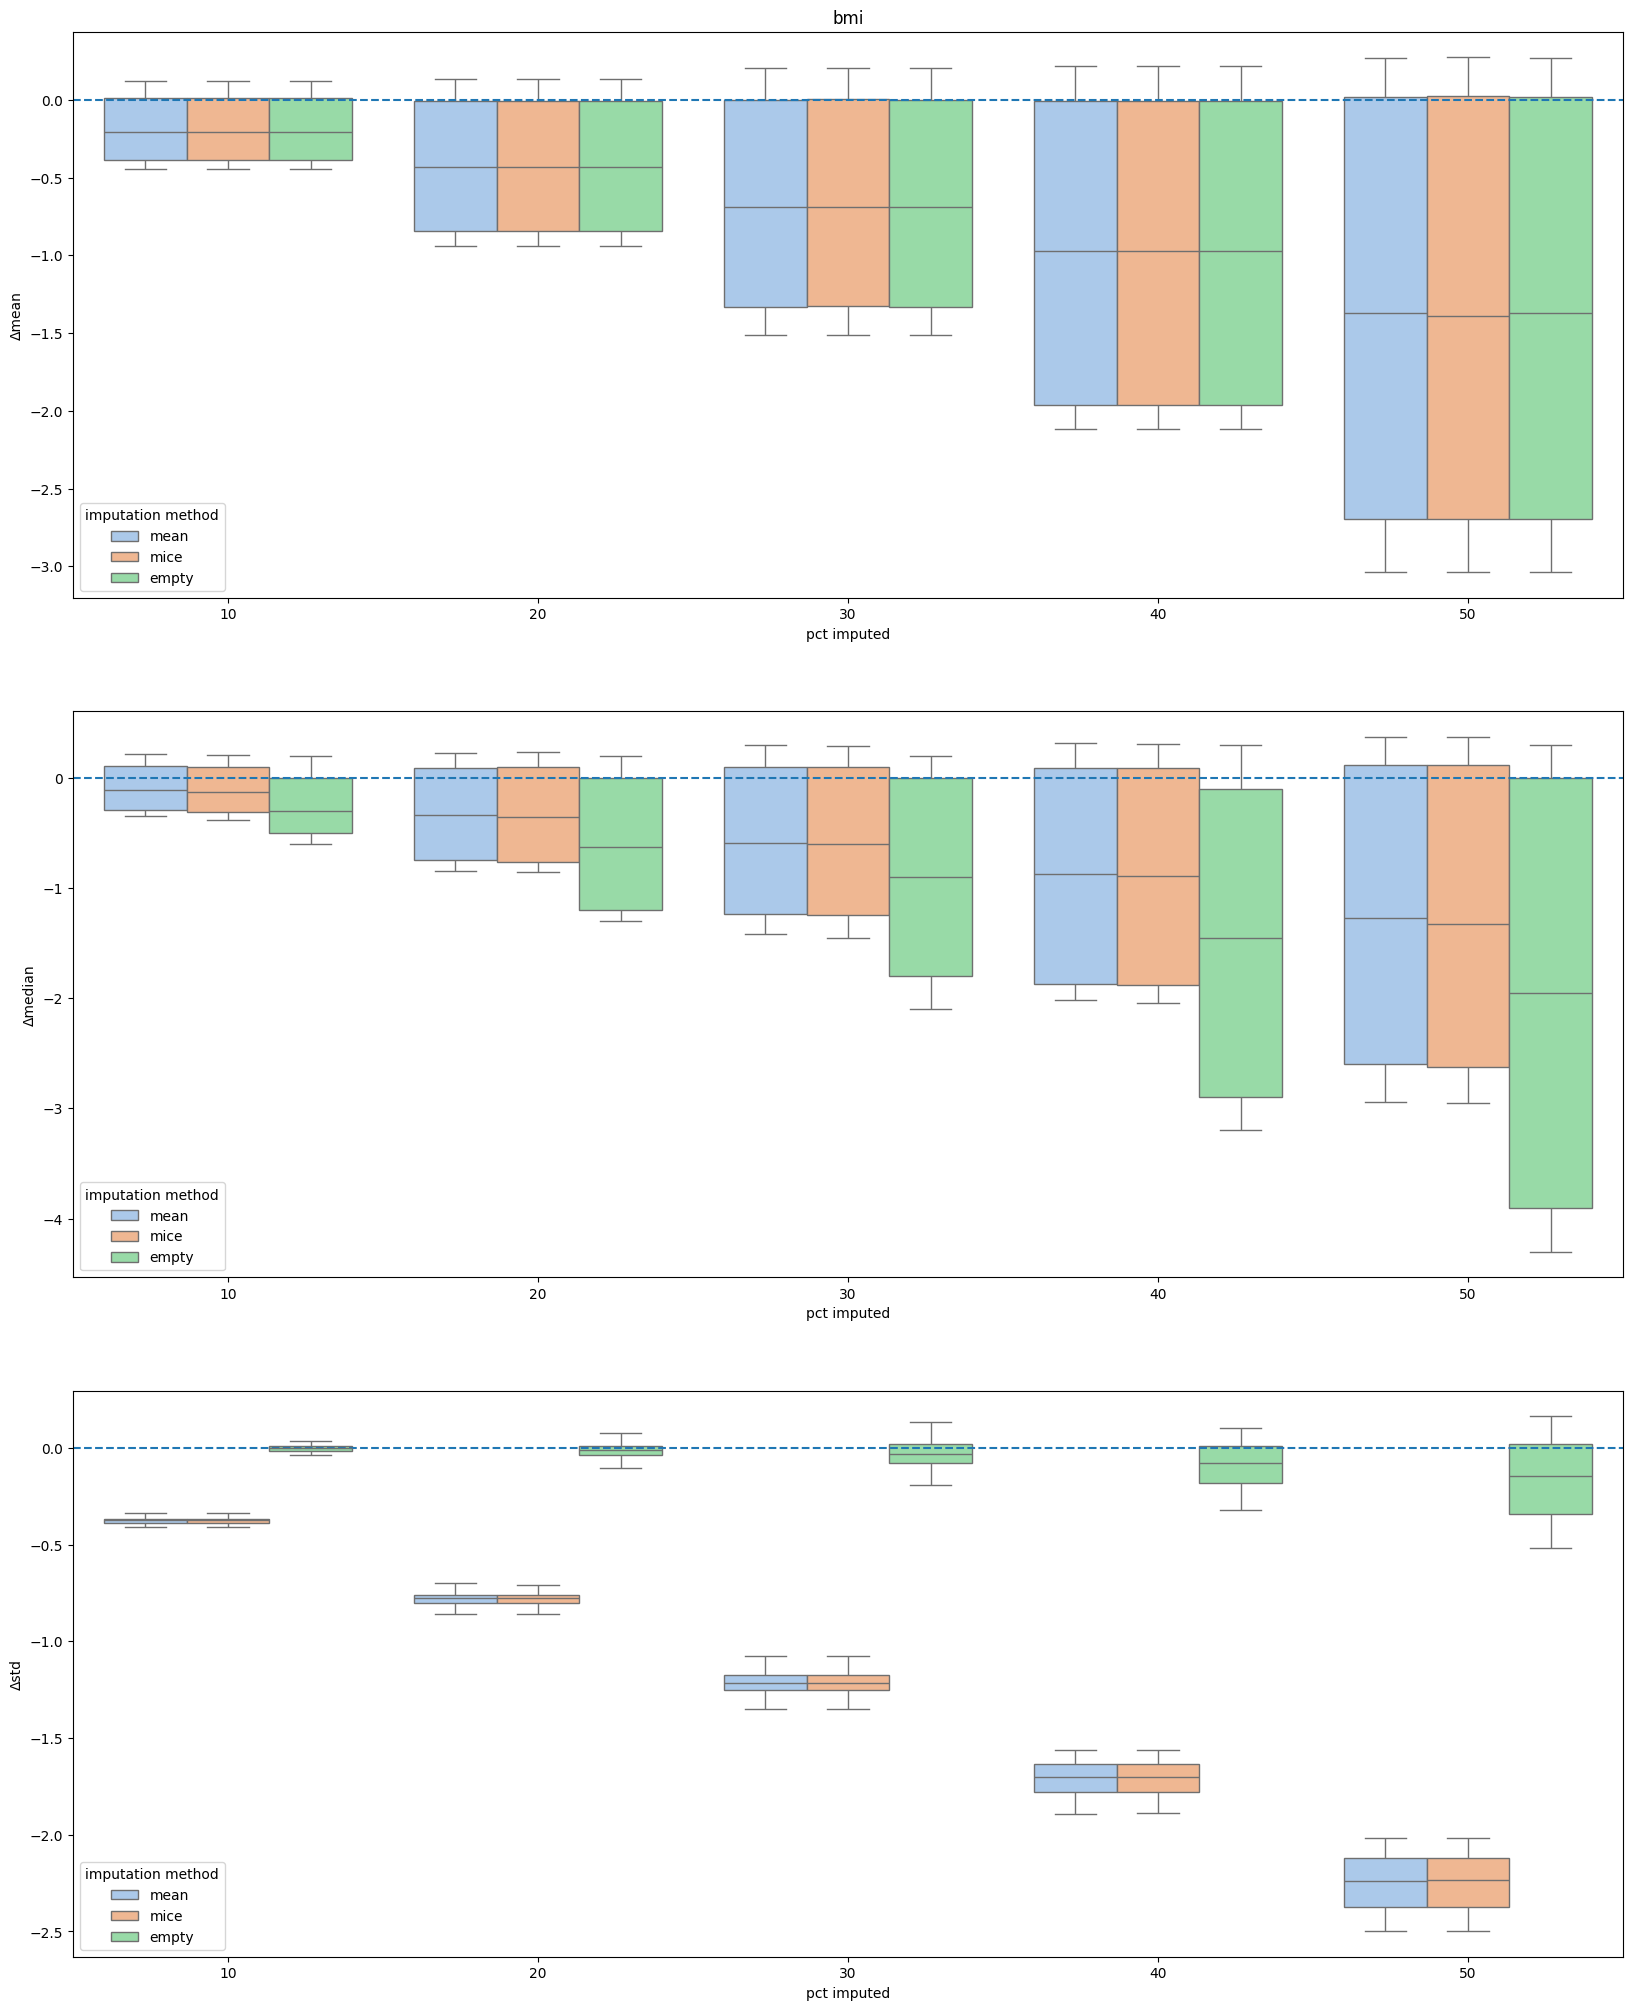

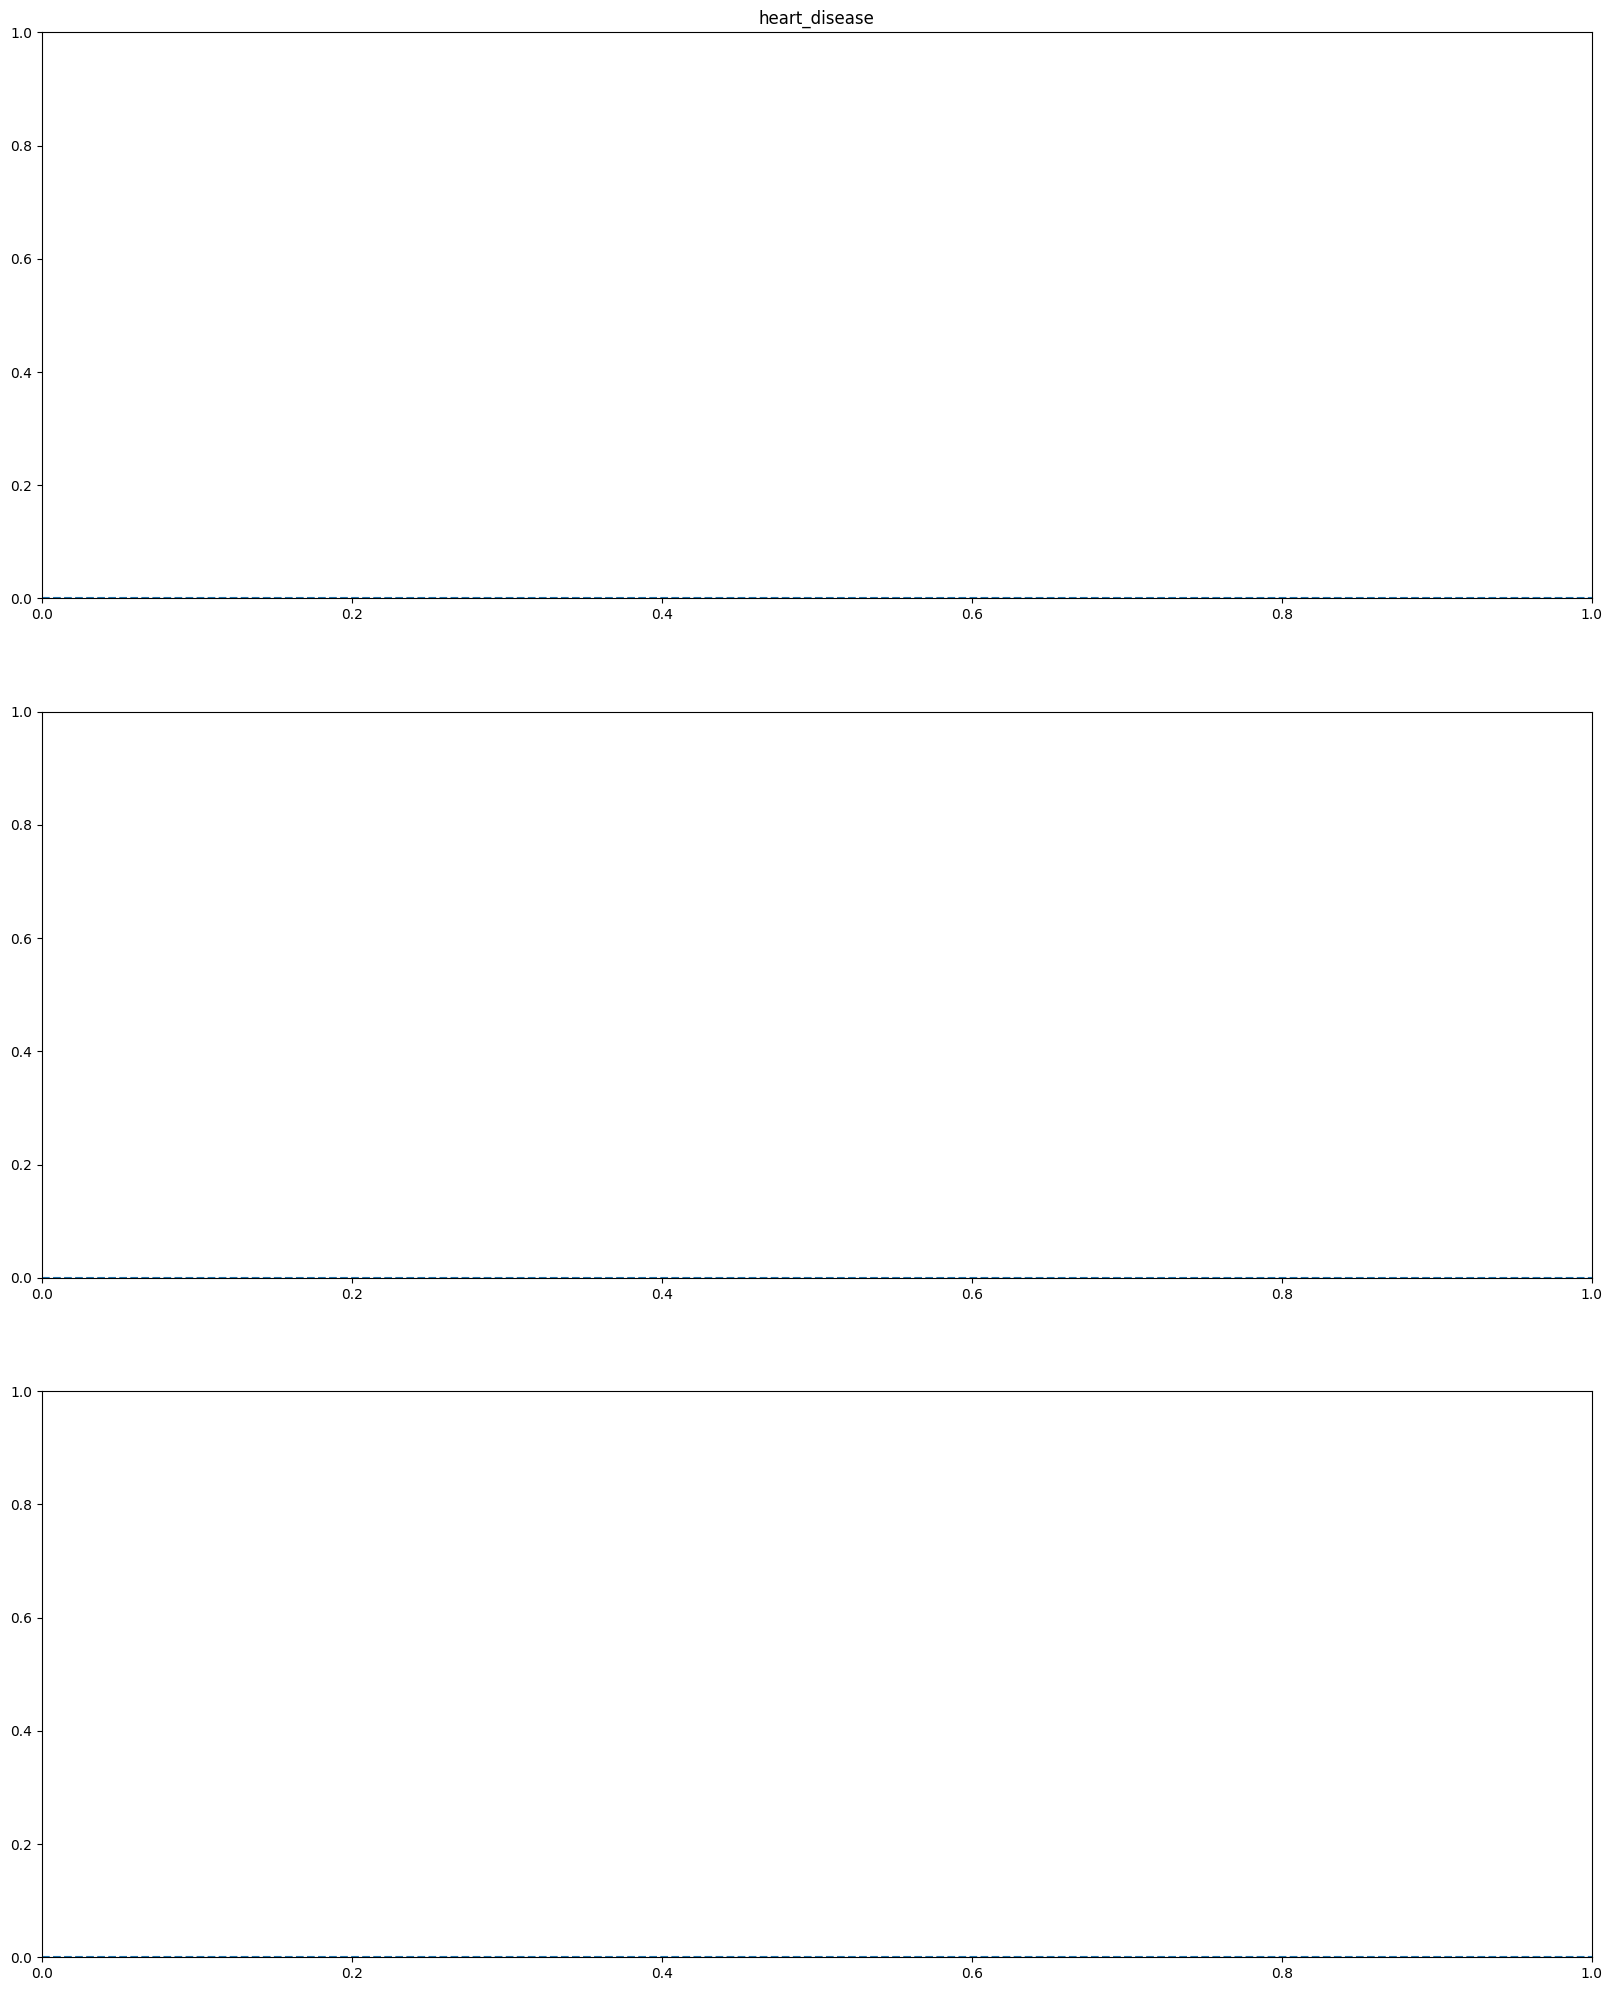

In [70]:
for i in df.columns:
    generate_vis_imp(df_vis[df_vis['attribute'] == i], i)

In [ ]:
df_2 = df[['TGO_MAX']].copy()
df_vis1 = generate_results(df_2, 'mean')
df_vis2 = generate_results(df_2, 'median')
df_vis3 = generate_results(df_2, 'mode')
df_vis4 = generate_results(df_2, 'knn_2')
df_vis5 = generate_results(df_2, 'knn_3')
# df_vis5 = generate_results(df, 'mice')

In [ ]:
df_vis6 = generate_results(df_2, 'mice')

In [ ]:
df_vis7 = generate_results(df_2, 'missforest')

In [ ]:
df_vis7 = generate_results(df_2, 'empty')

In [ ]:
df_vis = pd.concat([df_vis1, df_vis2, df_vis3, df_vis4, df_vis5, df_vis6, df_vis7])

In [ ]:
for i in df_2.columns:
    generate_vis(df_vis, i, max_value1)